# Bilateral Model

In [6]:

%load_ext autoreload
%autoreload 2

# Import library
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import joblib
from os.path import join
import sys

fp_project_folder = "../../"
sys.path.append(fp_project_folder)

from src.configs.config import input_cols, intermediate_col_dict, tcu_col, \
    le_label, re_label, num_input_cols
from src.configs.config import fp_checkpoint_folder, fp_data_folder

from src.models.bilateral.tuning import tune_model
from src.models.bilateral.training.training import transfer_ae, transfer_ae_n_ic
from src.models.bilateral.training.training_ae import train_ae, evaluate_ae
from src.models.bilateral.training.training_ic import train_ic, evaluate_ic
from src.models.bilateral.training.training_fc import train_fc, evaluate_fc
from src.preprocessing.tabular_preprocessing import choose_output_cols
from src.display import display_tuning_df
from src.saving import save_hyperparameters, load_hyperparameters, save_predictions, load_predictions
from src.models.bilateral.model import BilateralModel
from src.misc import set_seed
from src.models.bilateral.evaluate import evaluate_final_model

fp_col_info_file = join(fp_data_folder, "col_info.joblib")
fp_data_dfs_file = join(fp_data_folder, "data_dfs.joblib")

seed_no = 2024
batch_size = 16
repetitions = 5


print(tf.config.list_physical_devices('GPU'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')]


## Load Data

In [3]:
data_dfs = joblib.load(fp_data_dfs_file)
col_info = joblib.load(fp_col_info_file)
col_info = choose_output_cols(col_info, bilateral=True)
col_info

{'input_cols': ['Vision Test',
  'VA',
  'IOP',
  'Gradable',
  'Cup Disc Ratio',
  'OCT RNFL_Abnormal (Progressing)',
  'OCT RNFL_Abnormal (Stable)',
  'OCT RNFL_Normal',
  'OCT RNFL_Unreliable',
  'OCT RNFL_nan',
  'MAC GCA_Abnormal (Progressing)',
  'MAC GCA_Abnormal (Stable)',
  'MAC GCA_Normal',
  'MAC GCA_Unreliable',
  'MAC GCA_nan',
  'HVF_Abnormal (Stable)',
  'HVF_Normal',
  'HVF: flat, no IRF/SRF.',
  'HVF_Unreliable',
  'HVF_nan',
  'DRF_DH/MA',
  'DRF_CWS',
  'DRF_BH',
  'DRF_FH',
  'DRF_NVE',
  'DRF_IRMA',
  'DRF_PRH',
  'DRF_10M',
  'DMF_DH/MA',
  'DMF_BH',
  'DMF_Inner',
  'DMF_Better',
  'DMF_HE',
  'AMDF_DDin',
  'AMDF_GT125',
  'AMDF_PA',
  'AMDF_GA',
  'AMDF_PED',
  'AMDF_SFS',
  'AMDF_SR/subRPE',
  'AMDF_CNVM',
  'GSF_RT',
  'GSF_Notch',
  'GSF_CDR',
  'GSF_DA',
  'GSF_DH',
  'OCTM_IRF',
  'OCTM_Normal',
  'OCTM_Atrophy',
  'OCTM_ERMpreservedFC',
  'OCTM_Others',
  'OCTM_ISOSloss',
  'OCTM_VRtraction',
  'OCTM_Drusen',
  'OCTM_ERMdetVA',
  'OCTM_ERMlossFC',
  'OCTM

## Training

### AE Model

#### Tuning

{'ae_width': 64, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 5, 'rho': 0.1}:   0%| | 0/9

Epoch 1/1000
85/85 [==============================] - 1s 7ms/step - loss: 1.5587 - mse: 0.0716 - val_loss: 1.5667 - val_mse: 0.0412
Epoch 2/1000
85/85 [==============================] - 1s 6ms/step - loss: 1.5157 - mse: 0.0371 - val_loss: 1.5598 - val_mse: 0.0326
Epoch 3/1000
85/85 [==============================] - 0s 5ms/step - loss: 1.5073 - mse: 0.0281 - val_loss: 1.5541 - val_mse: 0.0272
Epoch 4/1000
85/85 [==============================] - 0s 5ms/step - loss: 1.5054 - mse: 0.0268 - val_loss: 1.5535 - val_mse: 0.0273
Epoch 5/1000
85/85 [==============================] - 0s 6ms/step - loss: 1.5049 - mse: 0.0268 - val_loss: 1.5530 - val_mse: 0.0271
Epoch 6/1000
85/85 [==============================] - 0s 5ms/step - loss: 1.5047 - mse: 0.0269 - val_loss: 1.5527 - val_mse: 0.0271
Epoch 7/1000
85/85 [==============================] - 0s 5ms/step - loss: 1.5045 - mse: 0.0268 - val_loss: 1.5523 - val_mse: 0.0269
Epoch 8/1000
85/85 [==============================] - 0s 5ms/step - loss: 1.

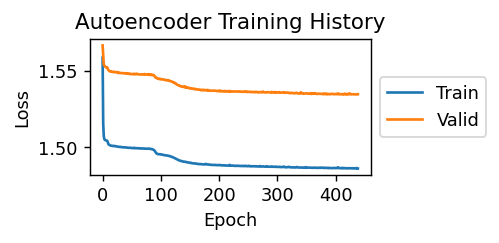

{'ae_width': 64, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 5, 'rho': 0.3}:  11%| | 1/9

Epoch 1/1000
85/85 [==============================] - 2s 12ms/step - loss: 0.4052 - mse: 0.0647 - val_loss: 0.3817 - val_mse: 0.0378
Epoch 2/1000
85/85 [==============================] - 1s 9ms/step - loss: 0.3643 - mse: 0.0314 - val_loss: 0.3707 - val_mse: 0.0271
Epoch 3/1000
85/85 [==============================] - 1s 16ms/step - loss: 0.3587 - mse: 0.0265 - val_loss: 0.3692 - val_mse: 0.0265
Epoch 4/1000
85/85 [==============================] - 2s 18ms/step - loss: 0.3579 - mse: 0.0262 - val_loss: 0.3688 - val_mse: 0.0263
Epoch 5/1000
85/85 [==============================] - 2s 19ms/step - loss: 0.3573 - mse: 0.0258 - val_loss: 0.3680 - val_mse: 0.0257
Epoch 6/1000
85/85 [==============================] - 2s 19ms/step - loss: 0.3563 - mse: 0.0249 - val_loss: 0.3667 - val_mse: 0.0244
Epoch 7/1000
85/85 [==============================] - 1s 16ms/step - loss: 0.3545 - mse: 0.0230 - val_loss: 0.3647 - val_mse: 0.0223
Epoch 8/1000
85/85 [==============================] - 1s 17ms/step - l

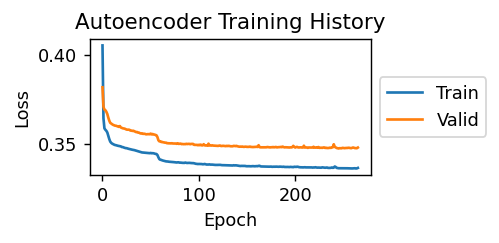

{'ae_width': 64, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 5, 'rho': 0.5}:  22%|▏| 2/9

Epoch 1/1000
85/85 [==============================] - 4s 26ms/step - loss: 0.0523 - mse: 0.0475 - val_loss: 0.0279 - val_mse: 0.0254
Epoch 2/1000
85/85 [==============================] - 2s 19ms/step - loss: 0.0231 - mse: 0.0214 - val_loss: 0.0193 - val_mse: 0.0177
Epoch 3/1000
85/85 [==============================] - 2s 18ms/step - loss: 0.0151 - mse: 0.0137 - val_loss: 0.0124 - val_mse: 0.0111
Epoch 4/1000
85/85 [==============================] - 2s 18ms/step - loss: 0.0109 - mse: 0.0099 - val_loss: 0.0099 - val_mse: 0.0088
Epoch 5/1000
85/85 [==============================] - 1s 17ms/step - loss: 0.0092 - mse: 0.0083 - val_loss: 0.0084 - val_mse: 0.0075
Epoch 6/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.0081 - mse: 0.0073 - val_loss: 0.0073 - val_mse: 0.0065
Epoch 7/1000
85/85 [==============================] - 2s 18ms/step - loss: 0.0073 - mse: 0.0066 - val_loss: 0.0067 - val_mse: 0.0059
Epoch 8/1000
85/85 [==============================] - 1s 16ms/step - 

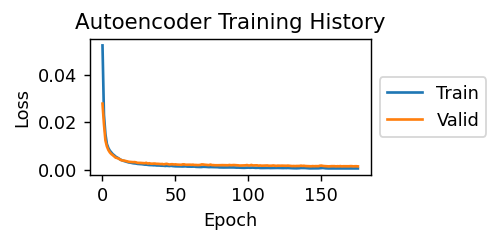

{'ae_width': 128, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 5, 'rho': 0.1}:  33%|▎| 3/

Epoch 1/1000
85/85 [==============================] - 3s 19ms/step - loss: 3.0283 - mse: 0.0614 - val_loss: 3.0885 - val_mse: 0.0371
Epoch 2/1000
85/85 [==============================] - 1s 15ms/step - loss: 2.9860 - mse: 0.0300 - val_loss: 3.0787 - val_mse: 0.0275
Epoch 3/1000
85/85 [==============================] - 1s 16ms/step - loss: 2.9821 - mse: 0.0269 - val_loss: 3.0775 - val_mse: 0.0273
Epoch 4/1000
85/85 [==============================] - 1s 16ms/step - loss: 2.9815 - mse: 0.0269 - val_loss: 3.0774 - val_mse: 0.0276
Epoch 5/1000
85/85 [==============================] - 1s 17ms/step - loss: 2.9814 - mse: 0.0270 - val_loss: 3.0771 - val_mse: 0.0273
Epoch 6/1000
85/85 [==============================] - 1s 16ms/step - loss: 2.9812 - mse: 0.0269 - val_loss: 3.0767 - val_mse: 0.0272
Epoch 7/1000
85/85 [==============================] - 1s 15ms/step - loss: 2.9810 - mse: 0.0269 - val_loss: 3.0764 - val_mse: 0.0270
Epoch 8/1000
85/85 [==============================] - 1s 16ms/step - 

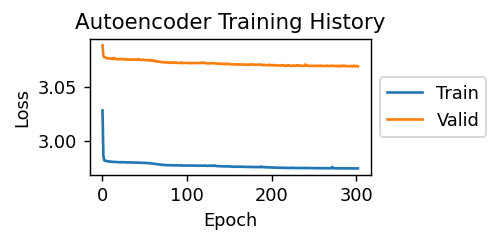

{'ae_width': 128, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 5, 'rho': 0.3}:  44%|▍| 4/

Epoch 1/1000
85/85 [==============================] - 3s 18ms/step - loss: 0.7255 - mse: 0.0536 - val_loss: 0.7160 - val_mse: 0.0313
Epoch 2/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.6896 - mse: 0.0272 - val_loss: 0.7101 - val_mse: 0.0268
Epoch 3/1000
85/85 [==============================] - 1s 16ms/step - loss: 0.6879 - mse: 0.0262 - val_loss: 0.7092 - val_mse: 0.0261
Epoch 4/1000
85/85 [==============================] - 1s 15ms/step - loss: 0.6872 - mse: 0.0256 - val_loss: 0.7080 - val_mse: 0.0249
Epoch 5/1000
85/85 [==============================] - 1s 15ms/step - loss: 0.6854 - mse: 0.0238 - val_loss: 0.7056 - val_mse: 0.0224
Epoch 6/1000
85/85 [==============================] - 1s 15ms/step - loss: 0.6842 - mse: 0.0226 - val_loss: 0.7051 - val_mse: 0.0220
Epoch 7/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.6824 - mse: 0.0207 - val_loss: 0.7032 - val_mse: 0.0199
Epoch 8/1000
85/85 [==============================] - 1s 14ms/step - 

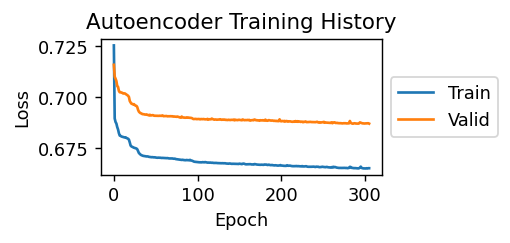

{'ae_width': 128, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 5, 'rho': 0.5}:  56%|▌| 5/

Epoch 1/1000
85/85 [==============================] - 3s 19ms/step - loss: 0.0398 - mse: 0.0357 - val_loss: 0.0174 - val_mse: 0.0153
Epoch 2/1000
85/85 [==============================] - 1s 17ms/step - loss: 0.0122 - mse: 0.0107 - val_loss: 0.0093 - val_mse: 0.0081
Epoch 3/1000
85/85 [==============================] - 1s 17ms/step - loss: 0.0082 - mse: 0.0073 - val_loss: 0.0068 - val_mse: 0.0059
Epoch 4/1000
85/85 [==============================] - 1s 17ms/step - loss: 0.0065 - mse: 0.0057 - val_loss: 0.0058 - val_mse: 0.0050
Epoch 5/1000
85/85 [==============================] - 1s 16ms/step - loss: 0.0053 - mse: 0.0046 - val_loss: 0.0050 - val_mse: 0.0043
Epoch 6/1000
85/85 [==============================] - 2s 19ms/step - loss: 0.0045 - mse: 0.0039 - val_loss: 0.0042 - val_mse: 0.0037
Epoch 7/1000
85/85 [==============================] - 1s 16ms/step - loss: 0.0037 - mse: 0.0032 - val_loss: 0.0039 - val_mse: 0.0034
Epoch 8/1000
85/85 [==============================] - 1s 16ms/step - 

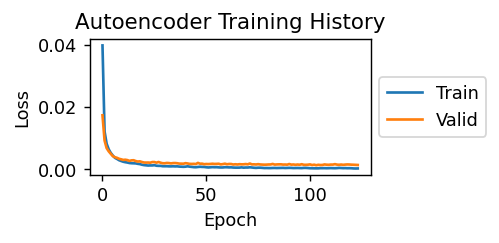

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 5, 'rho': 0.1}:  67%|▋| 6/

Epoch 1/1000
85/85 [==============================] - 3s 22ms/step - loss: 5.9778 - mse: 0.0569 - val_loss: 6.1339 - val_mse: 0.0337
Epoch 2/1000
85/85 [==============================] - 1s 14ms/step - loss: 5.9368 - mse: 0.0279 - val_loss: 6.1262 - val_mse: 0.0274
Epoch 3/1000
85/85 [==============================] - 1s 16ms/step - loss: 5.9351 - mse: 0.0272 - val_loss: 6.1261 - val_mse: 0.0279
Epoch 4/1000
85/85 [==============================] - 1s 16ms/step - loss: 5.9350 - mse: 0.0273 - val_loss: 6.1259 - val_mse: 0.0276
Epoch 5/1000
85/85 [==============================] - 2s 19ms/step - loss: 5.9345 - mse: 0.0270 - val_loss: 6.1253 - val_mse: 0.0274
Epoch 6/1000
85/85 [==============================] - 2s 19ms/step - loss: 5.9346 - mse: 0.0272 - val_loss: 6.1260 - val_mse: 0.0282
Epoch 7/1000
85/85 [==============================] - 1s 16ms/step - loss: 5.9343 - mse: 0.0270 - val_loss: 6.1245 - val_mse: 0.0267
Epoch 8/1000
85/85 [==============================] - 1s 17ms/step - 

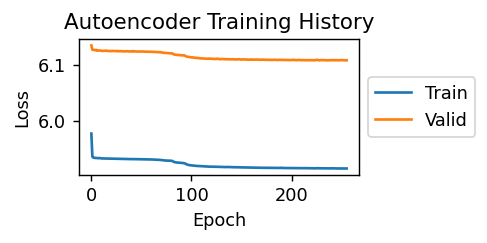

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 5, 'rho': 0.3}:  78%|▊| 7/

Epoch 1/1000
85/85 [==============================] - 4s 27ms/step - loss: 1.3821 - mse: 0.0519 - val_loss: 1.3949 - val_mse: 0.0297
Epoch 2/1000
85/85 [==============================] - 2s 20ms/step - loss: 1.3490 - mse: 0.0271 - val_loss: 1.3916 - val_mse: 0.0273
Epoch 3/1000
85/85 [==============================] - 2s 18ms/step - loss: 1.3483 - mse: 0.0269 - val_loss: 1.3912 - val_mse: 0.0273
Epoch 4/1000
85/85 [==============================] - 2s 18ms/step - loss: 1.3483 - mse: 0.0271 - val_loss: 1.3916 - val_mse: 0.0277
Epoch 5/1000
85/85 [==============================] - 2s 19ms/step - loss: 1.3481 - mse: 0.0270 - val_loss: 1.3911 - val_mse: 0.0273
Epoch 6/1000
85/85 [==============================] - 2s 19ms/step - loss: 1.3480 - mse: 0.0269 - val_loss: 1.3913 - val_mse: 0.0277
Epoch 7/1000
85/85 [==============================] - 1s 17ms/step - loss: 1.3480 - mse: 0.0270 - val_loss: 1.3905 - val_mse: 0.0268
Epoch 8/1000
85/85 [==============================] - 2s 18ms/step - 

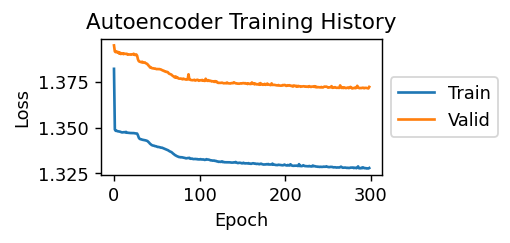

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 5, 'rho': 0.5}:  89%|▉| 8/

Epoch 1/1000
85/85 [==============================] - 3s 22ms/step - loss: 0.0306 - mse: 0.0270 - val_loss: 0.0109 - val_mse: 0.0093
Epoch 2/1000
85/85 [==============================] - 1s 16ms/step - loss: 0.0087 - mse: 0.0077 - val_loss: 0.0066 - val_mse: 0.0057
Epoch 3/1000
85/85 [==============================] - 1s 16ms/step - loss: 0.0054 - mse: 0.0047 - val_loss: 0.0045 - val_mse: 0.0038
Epoch 4/1000
85/85 [==============================] - 1s 16ms/step - loss: 0.0039 - mse: 0.0033 - val_loss: 0.0041 - val_mse: 0.0035
Epoch 5/1000
85/85 [==============================] - 2s 18ms/step - loss: 0.0034 - mse: 0.0029 - val_loss: 0.0033 - val_mse: 0.0028
Epoch 6/1000
85/85 [==============================] - 1s 16ms/step - loss: 0.0029 - mse: 0.0025 - val_loss: 0.0030 - val_mse: 0.0026
Epoch 7/1000
85/85 [==============================] - 1s 17ms/step - loss: 0.0026 - mse: 0.0022 - val_loss: 0.0028 - val_mse: 0.0025
Epoch 8/1000
85/85 [==============================] - 1s 16ms/step - 

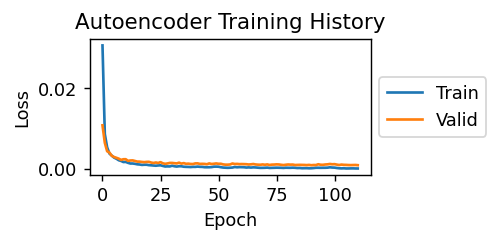

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 5, 'rho': 0.5}: 100%|█| 9/

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 5, 'rho': 0.5}


,ae_width,beta,final_classifier_width,intermediate_classifier_width,rho,valid_loss,valid_loss_wo_sparsity,best_epoch,training_time/s,best_hyperparameter
0,64,1.000000,2,5,0.100000,1.534644,0.009766,418,249.348583,False
1,64,1.000000,2,5,0.300000,0.347380,0.006133,245,376.747330,False
2,64,1.000000,2,5,0.500000,0.001437,0.001342,155,253.546263,False
3,128,1.000000,2,5,0.100000,3.069081,0.020215,282,432.049020,False
4,128,1.000000,2,5,0.300000,0.687097,0.005153,285,413.161770,False
5,128,1.000000,2,5,0.500000,0.001364,0.001281,103,187.128570,False
6,256,1.000000,2,5,0.100000,6.107487,0.009977,235,407.397454,False
7,256,1.000000,2,5,0.300000,1.371410,0.007776,278,443.117501,False
8,256,1.000000,2,5,0.500000,0.001004,0.000955,90,160.700252,True


In [17]:
ae_best_hyperparameters, ae_tuning_df = tune_model(
    **data_dfs, **col_info,
    hyperparameter_list_dict=dict(
        ae_width=[64, 128, 256], intermediate_classifier_width=[5], final_classifier_width=[2], 
        rho=[0.1, 0.3, 0.5], beta=[1.]
    ), 
    train_function=train_ae, 
    batch_size=batch_size, max_epochs=1000, patience=20, verbose=1, seed=seed_no,
)
print(ae_best_hyperparameters)
display_tuning_df(ae_tuning_df)

In [19]:
# Save Hyperparameters
save_hyperparameters(
    best_hyperparameters=ae_best_hyperparameters, tuning_df=ae_tuning_df, 
    name="ae_softmax", fp_checkpoint_folder=fp_checkpoint_folder, override=True
)

Checkpoint exist!
Hyperparameters Saved!


In [6]:
# Load Hyperparameters
ae_best_hyperparameters, ae_tuning_df  = load_hyperparameters(
    name="ae_softmax", fp_checkpoint_folder=fp_checkpoint_folder)
print(ae_best_hyperparameters)
display_tuning_df(ae_tuning_df)

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 5, 'rho': 0.5}


,ae_width,beta,final_classifier_width,intermediate_classifier_width,rho,valid_loss,valid_loss_wo_sparsity,best_epoch,training_time/s,best_hyperparameter
0,64,1.000000,2,5,0.100000,1.534644,0.009766,418,249.348583,False
1,64,1.000000,2,5,0.300000,0.347380,0.006133,245,376.747330,False
2,64,1.000000,2,5,0.500000,0.001437,0.001342,155,253.546263,False
3,128,1.000000,2,5,0.100000,3.069081,0.020215,282,432.049020,False
4,128,1.000000,2,5,0.300000,0.687097,0.005153,285,413.161770,False
5,128,1.000000,2,5,0.500000,0.001364,0.001281,103,187.128570,False
6,256,1.000000,2,5,0.100000,6.107487,0.009977,235,407.397454,False
7,256,1.000000,2,5,0.300000,1.371410,0.007776,278,443.117501,False
8,256,1.000000,2,5,0.500000,0.001004,0.000955,90,160.700252,True


#### Training

Epoch 1/1000
85/85 [==============================] - 3s 18ms/step - loss: 0.0306 - mse: 0.0270 - val_loss: 0.0109 - val_mse: 0.0093
Epoch 2/1000
85/85 [==============================] - 1s 15ms/step - loss: 0.0087 - mse: 0.0077 - val_loss: 0.0066 - val_mse: 0.0057
Epoch 3/1000
85/85 [==============================] - 1s 17ms/step - loss: 0.0054 - mse: 0.0047 - val_loss: 0.0045 - val_mse: 0.0038
Epoch 4/1000
85/85 [==============================] - 1s 17ms/step - loss: 0.0039 - mse: 0.0033 - val_loss: 0.0041 - val_mse: 0.0035
Epoch 5/1000
85/85 [==============================] - 1s 17ms/step - loss: 0.0034 - mse: 0.0029 - val_loss: 0.0033 - val_mse: 0.0028
Epoch 6/1000
85/85 [==============================] - 2s 18ms/step - loss: 0.0029 - mse: 0.0025 - val_loss: 0.0030 - val_mse: 0.0026
Epoch 7/1000
85/85 [==============================] - 1s 17ms/step - loss: 0.0026 - mse: 0.0022 - val_loss: 0.0028 - val_mse: 0.0025
Epoch 8/1000
85/85 [==============================] - 2s 21ms/step - 

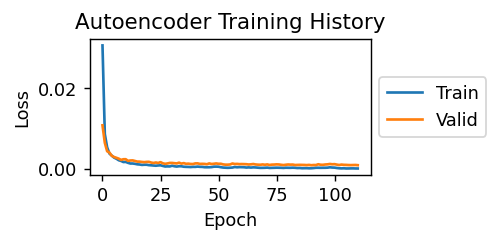

6/6 [==============================] - 0s 5ms/step


,Train,Valid,Test
Autoencoder MSE,0.000235,0.000955,0.001565


,Vision Test,VA,IOP,Gradable,Cup Disc Ratio,OCT RNFL_Abnormal (Progressing),OCT RNFL_Abnormal (Stable),OCT RNFL_Normal,OCT RNFL_Unreliable,OCT RNFL_nan,...,OCTM_ISOSloss_pred,OCTM_VRtraction_pred,OCTM_Drusen_pred,OCTM_ERMdetVA_pred,OCTM_ERMlossFC_pred,OCTM_SRF_pred,OCTM_Ungradable_pred,OCTM_Lamellar_pred,OCTM_IRHM_pred,split
0,1.0,0.000000,0.769231,1.0,0.894737,1.0,0.0,0.0,0.0,0.0,...,0.019852,-0.030895,-0.020593,-0.000667,-0.081288,-0.010477,-0.023032,-0.011114,-0.020770,train
1,0.0,0.000000,0.307692,1.0,0.736842,0.0,0.0,0.0,0.0,1.0,...,0.004060,0.003463,0.009758,-0.002606,0.002546,-0.011992,0.001608,0.008913,0.003339,train
2,1.0,0.000000,0.461538,1.0,0.736842,0.0,0.0,0.0,0.0,1.0,...,0.004444,-0.006233,-0.005215,-0.002359,-0.000398,-0.012065,-0.004306,0.000851,-0.000573,train
3,0.0,0.222222,0.461538,1.0,0.842105,0.0,0.0,0.0,0.0,1.0,...,1.109563,0.006012,0.001449,-0.002326,-0.010924,-0.018507,0.005528,0.013811,0.002421,train
4,0.0,0.333333,0.692308,1.0,0.684211,0.0,0.0,0.0,0.0,1.0,...,0.001256,0.002363,0.006542,-0.001290,0.002591,-0.015992,-0.001192,0.007289,0.007258,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,0.0,0.000000,0.666667,1.0,0.777778,0.0,0.0,0.0,0.0,1.0,...,0.011861,-0.001792,0.034076,-0.002737,-0.009315,0.000735,-0.000061,0.013272,-0.004045,test
1692,0.0,0.500000,0.400000,1.0,0.944444,0.0,1.0,0.0,0.0,0.0,...,0.004973,0.066694,-0.015608,-0.011431,-0.035268,0.000492,-0.003081,0.018230,-0.021167,test
1693,0.0,0.000000,0.333333,1.0,0.777778,0.0,0.0,0.0,0.0,1.0,...,0.000256,0.004029,-0.001300,-0.001102,-0.001471,-0.019331,0.001678,0.006845,-0.002015,test
1694,0.0,0.333333,0.400000,1.0,0.888889,0.0,0.0,0.0,0.0,1.0,...,0.003174,0.000592,0.005300,-0.003816,0.005420,-0.006434,0.001591,0.005957,0.000357,test


In [ ]:
set_seed(seed_no)
ae_bilateral_model = BilateralModel(**col_info, **ae_best_hyperparameters)
train_ae(
    ae_bilateral_model, **data_dfs,
    batch_size=batch_size, max_epochs=1000, patience=20, verbose=1, seed=seed_no
)
ae_perf_df, ae_pred_df = evaluate_ae(ae_bilateral_model, **data_dfs)
display(ae_perf_df)
display(ae_pred_df)

In [22]:
save_predictions(prediction_df=ae_pred_df, name="ae_softmax", fp_checkpoint_folder=fp_checkpoint_folder)

Predictions Saved!


In [ ]:
# Save model
fp_ae_model_checkpoint = join(fp_checkpoint_folder, "models", "ae_softmax")
ae_bilateral_model(tf.random.normal((2,num_input_cols)), tf.random.normal((2,num_input_cols)))
ae_bilateral_model.save(fp_ae_model_checkpoint)

INFO:tensorflow:Assets written to: ./checkpoints\models\ae_softmax\assets


INFO:tensorflow:Assets written to: ./checkpoints\models\ae_softmax\assets


In [ ]:
# Load model
fp_ae_model_checkpoint = join(fp_checkpoint_folder, "models", "ae_softmax")
ae_bilateral_model = tf.keras.models.load_model(fp_ae_model_checkpoint)
ae_perf_df, ae_pred_df = evaluate_ae(ae_bilateral_model, **data_dfs)
display(ae_perf_df)
display(ae_pred_df)

### Intermediate Classifier Model

#### Tuning

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 512, 'rho': 0.5}:   0%| | 

Restoring model weights from the end of the best epoch: 5.
Epoch 25: early stopping


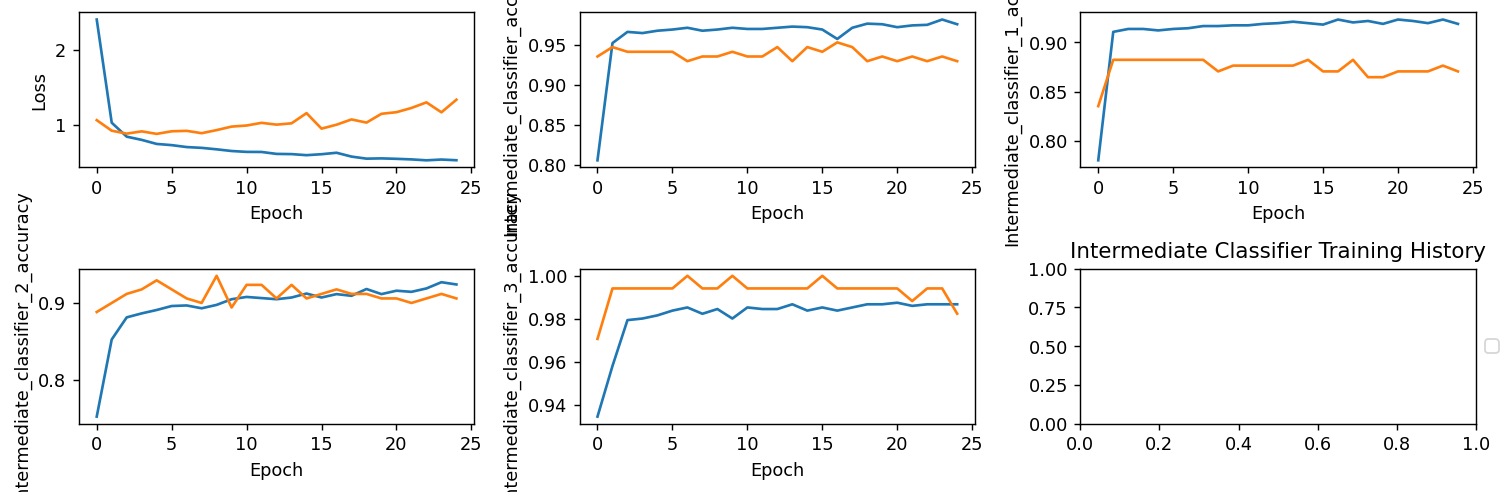

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 768, 'rho': 0.5}:  33%|▎| 

Restoring model weights from the end of the best epoch: 3.
Epoch 23: early stopping


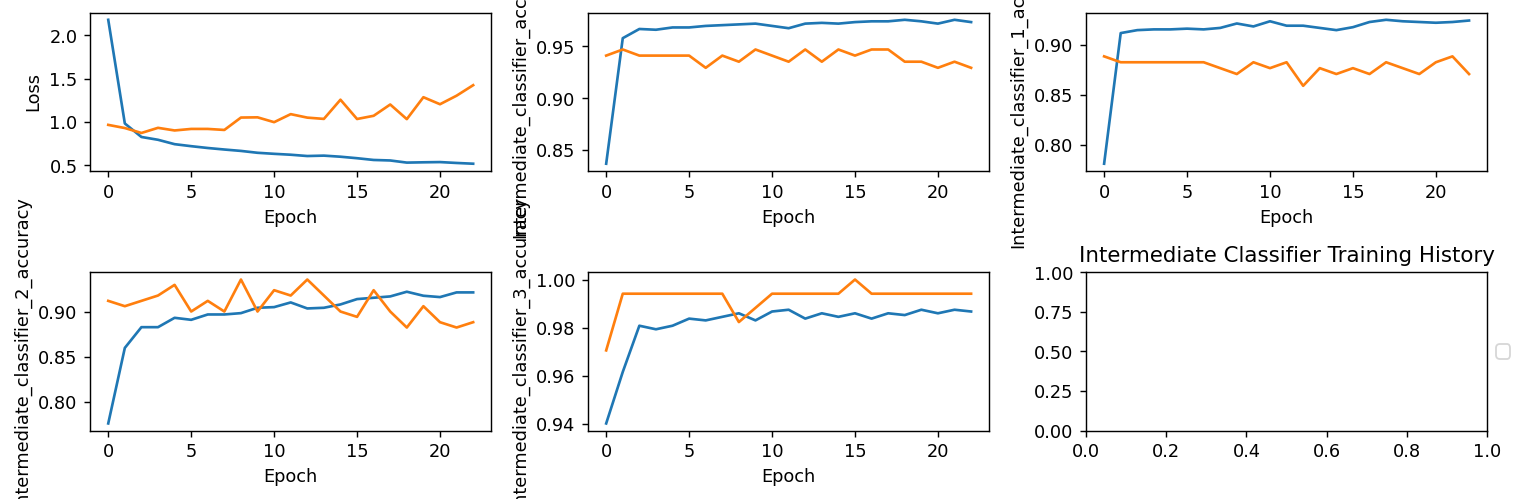

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 1024, 'rho': 0.5}:  67%|▋|

Restoring model weights from the end of the best epoch: 3.
Epoch 23: early stopping


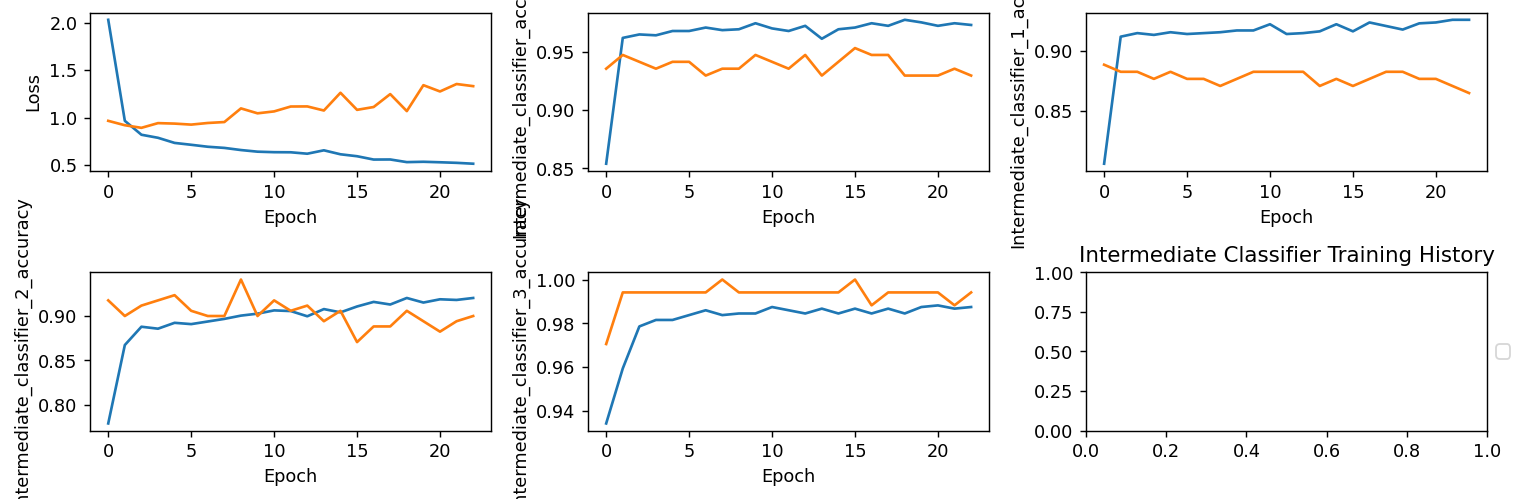

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 1024, 'rho': 0.5}: 100%|█|

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 768, 'rho': 0.5}


,ae_width,beta,final_classifier_width,intermediate_classifier_width,rho,valid_loss,valid_loss_wo_sparsity,best_epoch,training_time/s,best_hyperparameter
0,256,1.000000,2,512,0.500000,0.877941,0.877892,4,78.934741,False
1,256,1.000000,2,768,0.500000,0.874480,0.874431,2,77.478317,True
2,256,1.000000,2,1024,0.500000,0.893720,0.893671,2,70.483687,False


In [18]:
ic_best_hyperparameters, ic_tuning_df = tune_model(
    **data_dfs, **col_info,
    hyperparameter_list_dict=dict( 
        intermediate_classifier_width=[512, 768, 1024],
        ae_width=[ae_best_hyperparameters["ae_width"]], final_classifier_width=[ae_best_hyperparameters["final_classifier_width"]], 
        rho=[ae_best_hyperparameters["rho"]], beta=[ae_best_hyperparameters["beta"]]
    ), 
    train_function=train_ic, 
    base_bilateral_model = ae_bilateral_model, transfer_function=transfer_ae,
    batch_size=batch_size, max_epochs=1000, patience=20, verbose=0, seed=seed_no,
)
print(ic_best_hyperparameters)
display_tuning_df(ic_tuning_df) # Note that the loss found in the table without sparsity is only for the first intermediate classifier

In [27]:
# Save Hyperparameters
save_hyperparameters(
    best_hyperparameters=ic_best_hyperparameters, tuning_df=ic_tuning_df, 
    name="ic_softmax", fp_checkpoint_folder=fp_checkpoint_folder, override=True
)

Checkpoint exist!
Hyperparameters Saved!


In [20]:
# Load Hyperparameters
ic_best_hyperparameters, ic_tuning_df  = load_hyperparameters(name="ic_softmax", fp_checkpoint_folder=fp_checkpoint_folder)
print(ic_best_hyperparameters)
display_tuning_df(ic_tuning_df)

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 2, 'intermediate_classifier_width': 768, 'rho': 0.5}


,ae_width,beta,final_classifier_width,intermediate_classifier_width,rho,valid_loss,valid_loss_wo_sparsity,best_epoch,training_time/s,best_hyperparameter
0,256,1.000000,2,512,0.500000,0.877941,0.877892,4,78.934741,False
1,256,1.000000,2,768,0.500000,0.874480,0.874431,2,77.478317,True
2,256,1.000000,2,1024,0.500000,0.893720,0.893671,2,70.483687,False


#### Training

Restoring model weights from the end of the best epoch: 3.
Epoch 23: early stopping


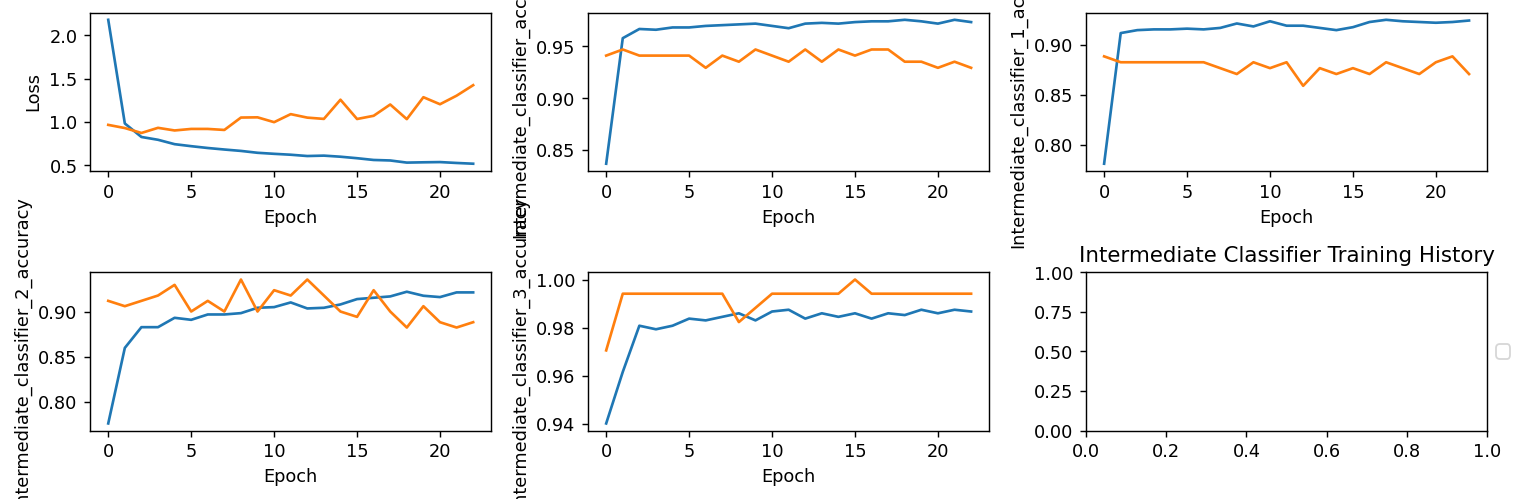

6/6 [==============================] - 0s 8ms/step


,Train,Valid,Test
DMC Categorical_crossentropy,0.110400,0.220226,0.092367
AMDC Categorical_crossentropy,0.237615,0.327773,0.394912
DRC Categorical_crossentropy,0.324897,0.304514,0.391416
GSC Categorical_crossentropy,0.058725,0.021931,0.078370
DMC Accuracy,0.967552,0.941176,0.976471
AMDC Accuracy,0.916667,0.882353,0.876471
DRC Accuracy,0.892330,0.911765,0.870588
GSC Accuracy,0.980088,0.994118,0.958824
DMC F1_score,0.917672,0.852339,0.885452
AMDC F1_score,0.464334,0.544274,0.670771


,DMC_M0,DMC_M1,DMC_M2,DMC_M3,DMC_M4,DMC_NA,AMDC_No,AMDC_Early,AMDC_Intermediate,AMDC_Advanced_1,...,DRC_MildNPDR_pred,DRC_ModerateNPDR_pred,DRC_SevereNPDR_pred,DRC_ProliferativeDR_pred,DRC_Unreadable_pred,DRC_NA_pred,GSC_G0_pred,GSC_G1_pred,GSC_NA_pred,split
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.005147,0.000440,2.167748e-07,7.759025e-08,1.401104e-05,4.615157e-09,0.002136,0.997679,1.854381e-04,train
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.037961,0.007389,4.306834e-05,2.205425e-05,4.886516e-04,3.474552e-06,0.995955,0.004034,1.181609e-05,train
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.099432,0.050316,1.447003e-03,1.141530e-03,8.967066e-03,3.355716e-04,0.995375,0.004584,4.074909e-05,train
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.976964,0.022952,4.666349e-06,5.450077e-07,4.920969e-07,2.469426e-09,0.999836,0.000164,4.586494e-09,train
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.045261,0.010093,8.197357e-05,4.426433e-05,8.240667e-04,7.899414e-06,0.994479,0.005503,1.805116e-05,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.944975,0.054384,1.146803e-04,1.791663e-05,1.671078e-05,2.646117e-07,0.999804,0.000196,2.111652e-08,test
1692,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.008692,0.000838,4.885601e-07,1.806087e-07,1.318790e-05,1.258943e-08,0.004065,0.995649,2.860178e-04,test
1693,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.023125,0.004081,1.235197e-05,6.079560e-06,1.935338e-04,7.719563e-07,0.987526,0.012441,3.347847e-05,test
1694,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.060058,0.027999,3.473808e-04,2.593926e-04,2.654664e-03,5.886752e-05,0.967056,0.032596,3.478639e-04,test


In [ ]:
set_seed(seed_no)
ic_bilateral_model = BilateralModel(**col_info, **ic_best_hyperparameters)
ic_bilateral_model = transfer_ae(base_bilateral_model=ae_bilateral_model, new_bilateral_model=ic_bilateral_model)
train_ic(
    ic_bilateral_model, **data_dfs,
    batch_size=batch_size, max_epochs=10000, patience=20, verbose=0, seed=seed_no
)
ic_perf_df, ic_pred_df = evaluate_ic(ic_bilateral_model, **data_dfs)
display(ic_perf_df)
display(ic_pred_df)

In [ ]:
# Save model
fp_ic_model_checkpoint = join(fp_checkpoint_folder, "models", "ic_softmax")
ic_bilateral_model(tf.random.normal((2,num_input_cols)), tf.random.normal((2,num_input_cols)))
ic_bilateral_model.save(fp_ic_model_checkpoint)

INFO:tensorflow:Assets written to: ./checkpoints\models\ic_softmax\assets


INFO:tensorflow:Assets written to: ./checkpoints\models\ic_softmax\assets


In [ ]:
# Load model
fp_ic_model_checkpoint = join(fp_checkpoint_folder, "models", "ic_softmax")
ic_bilateral_model = tf.keras.models.load_model(fp_ic_model_checkpoint)
ic_perf_df, ic_pred_df = evaluate_ic(ic_bilateral_model, **data_dfs)
display(ic_perf_df)
display(ic_pred_df)

6/6 [==============================] - 0s 14ms/step


,Train,Valid,Test
DMC Categorical_crossentropy,0.110400,0.220226,0.092367
AMDC Categorical_crossentropy,0.237615,0.327773,0.394912
DRC Categorical_crossentropy,0.324897,0.304514,0.391416
GSC Categorical_crossentropy,0.058725,0.021931,0.078370
DMC Accuracy,0.967552,0.941176,0.976471
AMDC Accuracy,0.916667,0.882353,0.876471
DRC Accuracy,0.892330,0.911765,0.870588
GSC Accuracy,0.980088,0.994118,0.958824
DMC F1_score,0.917672,0.852339,0.885452
AMDC F1_score,0.464334,0.544274,0.670771


,DMC_M0,DMC_M1,DMC_M2,DMC_M3,DMC_M4,DMC_NA,AMDC_No,AMDC_Early,AMDC_Intermediate,AMDC_Advanced_1,...,DRC_MildNPDR_pred,DRC_ModerateNPDR_pred,DRC_SevereNPDR_pred,DRC_ProliferativeDR_pred,DRC_Unreadable_pred,DRC_NA_pred,GSC_G0_pred,GSC_G1_pred,GSC_NA_pred,split
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.005147,0.000440,2.167748e-07,7.759025e-08,1.401104e-05,4.615157e-09,0.002136,0.997679,1.854381e-04,train
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.037961,0.007389,4.306834e-05,2.205425e-05,4.886516e-04,3.474552e-06,0.995955,0.004034,1.181609e-05,train
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.099432,0.050316,1.447003e-03,1.141530e-03,8.967066e-03,3.355716e-04,0.995375,0.004584,4.074909e-05,train
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.976964,0.022952,4.666349e-06,5.450077e-07,4.920969e-07,2.469426e-09,0.999836,0.000164,4.586494e-09,train
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.045261,0.010093,8.197357e-05,4.426433e-05,8.240667e-04,7.899414e-06,0.994479,0.005503,1.805116e-05,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.944975,0.054384,1.146803e-04,1.791663e-05,1.671078e-05,2.646117e-07,0.999804,0.000196,2.111652e-08,test
1692,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.008692,0.000838,4.885601e-07,1.806087e-07,1.318790e-05,1.258943e-08,0.004065,0.995649,2.860178e-04,test
1693,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.023125,0.004081,1.235197e-05,6.079560e-06,1.935338e-04,7.719563e-07,0.987526,0.012441,3.347847e-05,test
1694,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.060058,0.027999,3.473808e-04,2.593926e-04,2.654664e-03,5.886752e-05,0.967056,0.032596,3.478639e-04,test


In [32]:
save_predictions(prediction_df=ic_pred_df, name="ic_softmax", fp_checkpoint_folder=fp_checkpoint_folder)

Predictions Saved!


### Final Classifier Model

#### Tuning

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 32, 'intermediate_classifier_width': 768, 'rho': 0.5}:   0%| |

Restoring model weights from the end of the best epoch: 42.
Epoch 62: early stopping


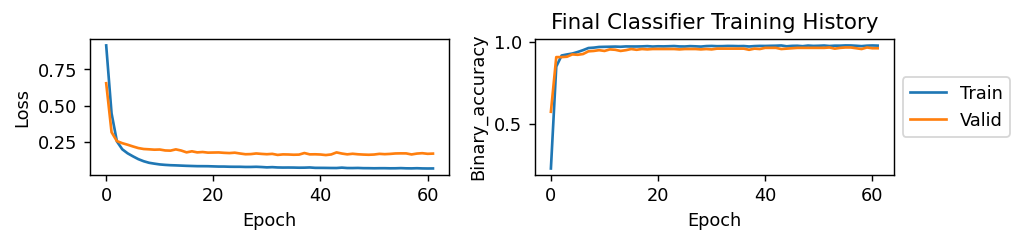

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 48, 'intermediate_classifier_width': 768, 'rho': 0.5}:  20%|▏|

Restoring model weights from the end of the best epoch: 27.
Epoch 47: early stopping


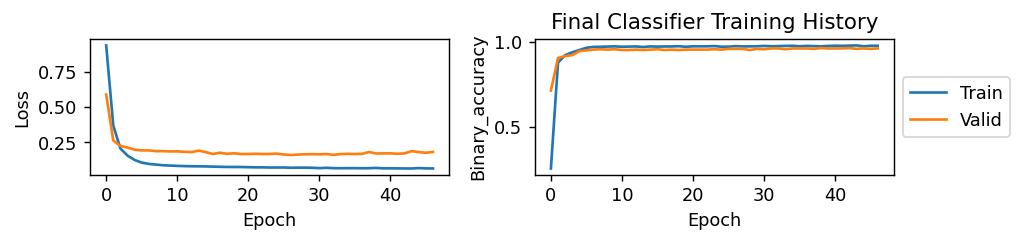

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 64, 'intermediate_classifier_width': 768, 'rho': 0.5}:  40%|▍|

Restoring model weights from the end of the best epoch: 27.
Epoch 47: early stopping


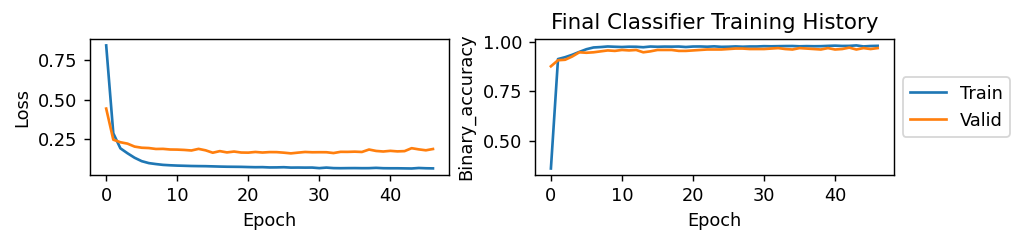

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 80, 'intermediate_classifier_width': 768, 'rho': 0.5}:  60%|▌|

Restoring model weights from the end of the best epoch: 33.
Epoch 53: early stopping


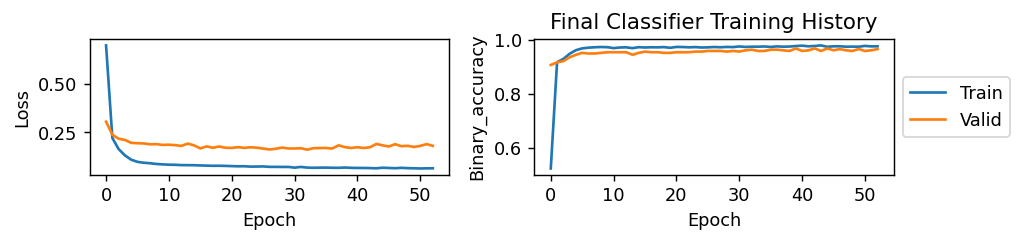

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 96, 'intermediate_classifier_width': 768, 'rho': 0.5}:  80%|▊|

Restoring model weights from the end of the best epoch: 16.
Epoch 36: early stopping


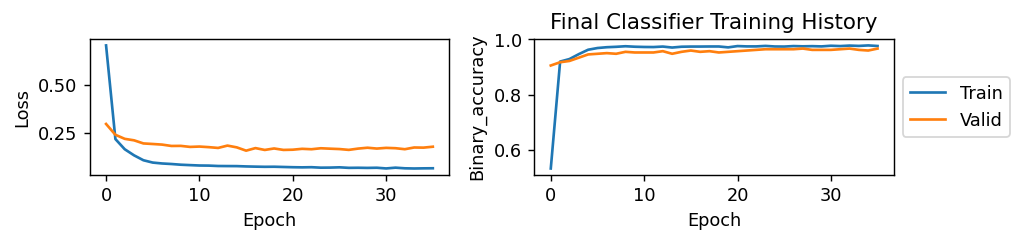

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 96, 'intermediate_classifier_width': 768, 'rho': 0.5}: 100%|█|

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 32, 'intermediate_classifier_width': 768, 'rho': 0.5}


,ae_width,beta,final_classifier_width,intermediate_classifier_width,rho,valid_loss,valid_loss_wo_sparsity,best_epoch,training_time/s,best_hyperparameter
0,256,1.000000,32,768,0.500000,0.158841,0.158702,41,80.120065,True
1,256,1.000000,48,768,0.500000,0.161506,0.161368,26,62.739115,False
2,256,1.000000,64,768,0.500000,0.161155,0.161017,26,64.085033,False
3,256,1.000000,80,768,0.500000,0.161082,0.160944,32,69.581012,False
4,256,1.000000,96,768,0.500000,0.159230,0.159092,15,52.631513,False


In [ ]:
fc_best_hyperparameters, fc_tuning_df = tune_model(
    **data_dfs, **col_info,
    hyperparameter_list_dict=dict(
        final_classifier_width=[32, 48, 64, 80, 96], 
        ae_width=[ic_best_hyperparameters["ae_width"]], 
        intermediate_classifier_width=[ic_best_hyperparameters["intermediate_classifier_width"]], 
        rho=[ic_best_hyperparameters["rho"]], beta=[ic_best_hyperparameters["beta"]]
    ), 
    train_function=train_fc, 
    base_bilateral_model = ic_bilateral_model, transfer_function=transfer_ae_n_ic,
    batch_size=batch_size, max_epochs=10000, patience=20, verbose=0, seed=seed_no,
)
print(fc_best_hyperparameters)
display_tuning_df(fc_tuning_df)

In [34]:
# Save Hyperparameters
save_hyperparameters(
    best_hyperparameters=fc_best_hyperparameters, tuning_df=fc_tuning_df, 
    name="fc_softmax", fp_checkpoint_folder=fp_checkpoint_folder, override=True
)

Checkpoint exist!
Hyperparameters Saved!


In [27]:
# Load Hyperparameters
fc_best_hyperparameters, fc_tuning_df  = load_hyperparameters(name="fc_softmax", fp_checkpoint_folder=fp_checkpoint_folder)
print(fc_best_hyperparameters)
display_tuning_df(fc_tuning_df)

{'ae_width': 256, 'beta': 1.0, 'final_classifier_width': 32, 'intermediate_classifier_width': 768, 'rho': 0.5}


,ae_width,beta,final_classifier_width,intermediate_classifier_width,rho,valid_loss,valid_loss_wo_sparsity,best_epoch,training_time/s,best_hyperparameter
0,256,1.000000,32,768,0.500000,0.158841,0.158702,41,80.120065,True
1,256,1.000000,48,768,0.500000,0.161506,0.161368,26,62.739115,False
2,256,1.000000,64,768,0.500000,0.161155,0.161017,26,64.085033,False
3,256,1.000000,80,768,0.500000,0.161082,0.160944,32,69.581012,False
4,256,1.000000,96,768,0.500000,0.159230,0.159092,15,52.631513,False


#### Training

Restoring model weights from the end of the best epoch: 42.
Epoch 62: early stopping


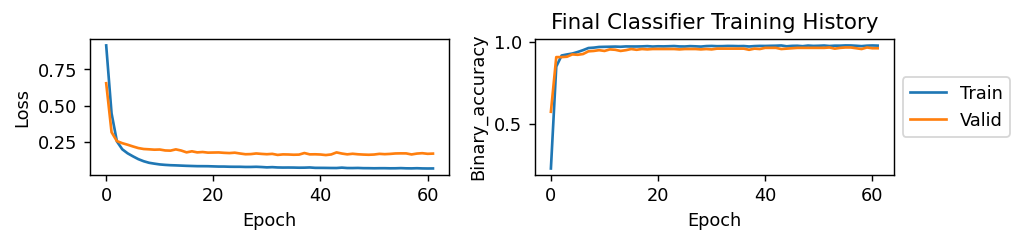

3/3 [==============================] - 0s 44ms/step


,Train,Valid,Test
Accuracy Total_Time >= 1.0,0.000,0.000,NaN
Accuracy Total_Time >= 13.0,0.694,0.909,0.750
Accuracy Total_Time >= 26.0,0.901,0.929,0.963
Accuracy Total_Time >= 4.33,1.000,0.800,0.875
Accuracy Total_Time >= 52.0,0.988,0.974,1.000
Final Classifier Accuracy,0.913,0.918,0.941
Final Classifier Bin Accuracy,0.978,0.965,0.984
Final Classifier Crossentropy,0.068,0.159,0.079
Total_Time >= 1.0 Proportion,0.004,0.024,0.000
Total_Time >= 13.0 Proportion,0.164,0.129,0.141


,Total_Time >= 1.0,Total_Time >= 4.33,Total_Time >= 13.0,Total_Time >= 26.0,Total_Time >= 52.0,Total_Time >= 1.0_pred,Total_Time >= 4.33_pred,Total_Time >= 13.0_pred,Total_Time >= 26.0_pred,Total_Time >= 52.0_pred,split
0,1.0,1.0,1.0,0.0,0.0,0.999538,0.994348,0.988413,0.017999,1.099880e-02,train
1,1.0,1.0,1.0,1.0,1.0,0.999833,0.998774,0.998048,0.988619,9.956942e-01,train
2,1.0,1.0,1.0,1.0,1.0,0.999818,0.998526,0.997934,0.943898,9.473234e-01,train
3,1.0,1.0,1.0,1.0,0.0,0.999756,0.998917,0.998648,0.894403,1.267766e-05,train
4,1.0,1.0,1.0,1.0,1.0,0.999835,0.998781,0.998063,0.988307,9.955348e-01,train
...,...,...,...,...,...,...,...,...,...,...,...
843,1.0,1.0,1.0,1.0,0.0,0.999857,0.999647,0.999902,0.924420,1.878929e-05,test
844,1.0,1.0,1.0,0.0,0.0,0.999532,0.993939,0.986949,0.015290,9.930315e-03,test
845,1.0,1.0,1.0,1.0,1.0,0.999722,0.998546,0.997045,0.988752,9.888359e-01,test
846,1.0,1.0,1.0,1.0,0.0,0.999842,0.999053,0.998862,0.913160,2.373496e-03,test


In [29]:
set_seed(seed_no)
fc_bilateral_model = BilateralModel(**col_info, **fc_best_hyperparameters,)
fc_bilateral_model = transfer_ae_n_ic(base_bilateral_model=ic_bilateral_model, new_bilateral_model=fc_bilateral_model)
train_fc(
    fc_bilateral_model, **data_dfs,
    batch_size=batch_size, max_epochs=1000, patience=20, verbose=0, seed=seed_no
)
fc_perf_df, fc_pred_df = evaluate_fc(
    fc_bilateral_model, **data_dfs
)
display(fc_perf_df)
display(fc_pred_df)

In [ ]:
# Save model
fp_fc_model_checkpoint = join(fp_checkpoint_folder, "models", "fc_softmax")
fc_bilateral_model(tf.random.normal((2,num_input_cols)), tf.random.normal((2,num_input_cols)))
fc_bilateral_model.save(fp_fc_model_checkpoint)

INFO:tensorflow:Assets written to: ./checkpoints\models\fc_softmax\assets


INFO:tensorflow:Assets written to: ./checkpoints\models\fc_softmax\assets


In [ ]:
# Load model
fp_fc_model_checkpoint = join(fp_checkpoint_folder, "models", "fc_softmax")
fc_bilateral_model = tf.keras.models.load_model(fp_fc_model_checkpoint)
fc_perf_df, fc_pred_df = evaluate_fc(
    fc_bilateral_model, **data_dfs
)
display(fc_perf_df)
display(fc_pred_df)

3/3 [==============================] - 0s 8ms/step


,Train,Valid,Test
Accuracy Total_Time >= 1.0,0.000,0.000,NaN
Accuracy Total_Time >= 13.0,0.694,0.909,0.750
Accuracy Total_Time >= 26.0,0.901,0.929,0.963
Accuracy Total_Time >= 4.33,1.000,0.800,0.875
Accuracy Total_Time >= 52.0,0.988,0.974,1.000
Final Classifier Accuracy,0.913,0.918,0.941
Final Classifier Bin Accuracy,0.978,0.965,0.984
Final Classifier Crossentropy,0.068,0.159,0.079
Total_Time >= 1.0 Proportion,0.004,0.024,0.000
Total_Time >= 13.0 Proportion,0.164,0.129,0.141


,Total_Time >= 1.0,Total_Time >= 4.33,Total_Time >= 13.0,Total_Time >= 26.0,Total_Time >= 52.0,Total_Time >= 1.0_pred,Total_Time >= 4.33_pred,Total_Time >= 13.0_pred,Total_Time >= 26.0_pred,Total_Time >= 52.0_pred,split
0,1.0,1.0,1.0,0.0,0.0,0.999538,0.994348,0.988413,0.017999,1.099880e-02,train
1,1.0,1.0,1.0,1.0,1.0,0.999833,0.998774,0.998048,0.988619,9.956942e-01,train
2,1.0,1.0,1.0,1.0,1.0,0.999818,0.998526,0.997934,0.943898,9.473234e-01,train
3,1.0,1.0,1.0,1.0,0.0,0.999756,0.998917,0.998648,0.894403,1.267766e-05,train
4,1.0,1.0,1.0,1.0,1.0,0.999835,0.998781,0.998063,0.988307,9.955348e-01,train
...,...,...,...,...,...,...,...,...,...,...,...
843,1.0,1.0,1.0,1.0,0.0,0.999857,0.999647,0.999902,0.924420,1.878929e-05,test
844,1.0,1.0,1.0,0.0,0.0,0.999532,0.993939,0.986949,0.015290,9.930315e-03,test
845,1.0,1.0,1.0,1.0,1.0,0.999722,0.998546,0.997045,0.988752,9.888359e-01,test
846,1.0,1.0,1.0,1.0,0.0,0.999842,0.999053,0.998862,0.913160,2.373496e-03,test


In [39]:
save_predictions(prediction_df=fc_pred_df, name="fc_softmax", fp_checkpoint_folder=fp_checkpoint_folder)

Predictions Saved!


In [41]:
fc_pred_df = load_predictions(name="fc_softmax", fp_checkpoint_folder=fp_checkpoint_folder)
fc_pred_df.head()

,Total_Time >= 1.0,Total_Time >= 4.33,Total_Time >= 13.0,Total_Time >= 26.0,Total_Time >= 52.0,Total_Time >= 1.0_pred,Total_Time >= 4.33_pred,Total_Time >= 13.0_pred,Total_Time >= 26.0_pred,Total_Time >= 52.0_pred,split
0,1.0,1.0,1.0,0.0,0.0,0.999538,0.994348,0.988413,0.017999,0.010999,train
1,1.0,1.0,1.0,1.0,1.0,0.999833,0.998774,0.998048,0.988619,0.995694,train
2,1.0,1.0,1.0,1.0,1.0,0.999818,0.998526,0.997934,0.943898,0.947323,train
3,1.0,1.0,1.0,1.0,0.0,0.999756,0.998917,0.998648,0.894403,0.000013,train
4,1.0,1.0,1.0,1.0,1.0,0.999835,0.998781,0.998063,0.988307,0.995535,train


## Evaluation + Prediction

True
False


,M0,M1,M2,M3,M4,NA
M0,95,0,0,0,0,2
M1,0,3,0,0,0,0
M2,0,0,60,0,0,0
M3,0,0,0,1,0,0
M4,0,0,0,0,6,0
NA,2,0,0,0,0,1


,No,Early,Intermediate,Advanced 1,Advanced 2,NA
No,95,0,0,0,0,0
Early,20,36,0,0,0,0
Intermediate,0,0,18,0,0,0
Advanced 1,1,0,0,0,0,0
Advanced 2,0,0,0,0,0,0
NA,0,0,0,0,0,0


,No DR,Mild NPDR,Moderate NPDR,Severe NPDR,Proliferative DR,Unreadable,NA
No DR,81,0,0,0,0,2,0
Mild NPDR,9,55,7,0,0,0,0
Moderate NPDR,0,4,8,0,0,0,0
Severe NPDR,0,0,0,3,0,0,0
Proliferative DR,0,0,0,0,0,0,0
Unreadable,0,0,0,0,0,1,0
NA,0,0,0,0,0,0,0


,G0,G1,NA
G0,157,3,2
G1,2,6,0
NA,0,0,0


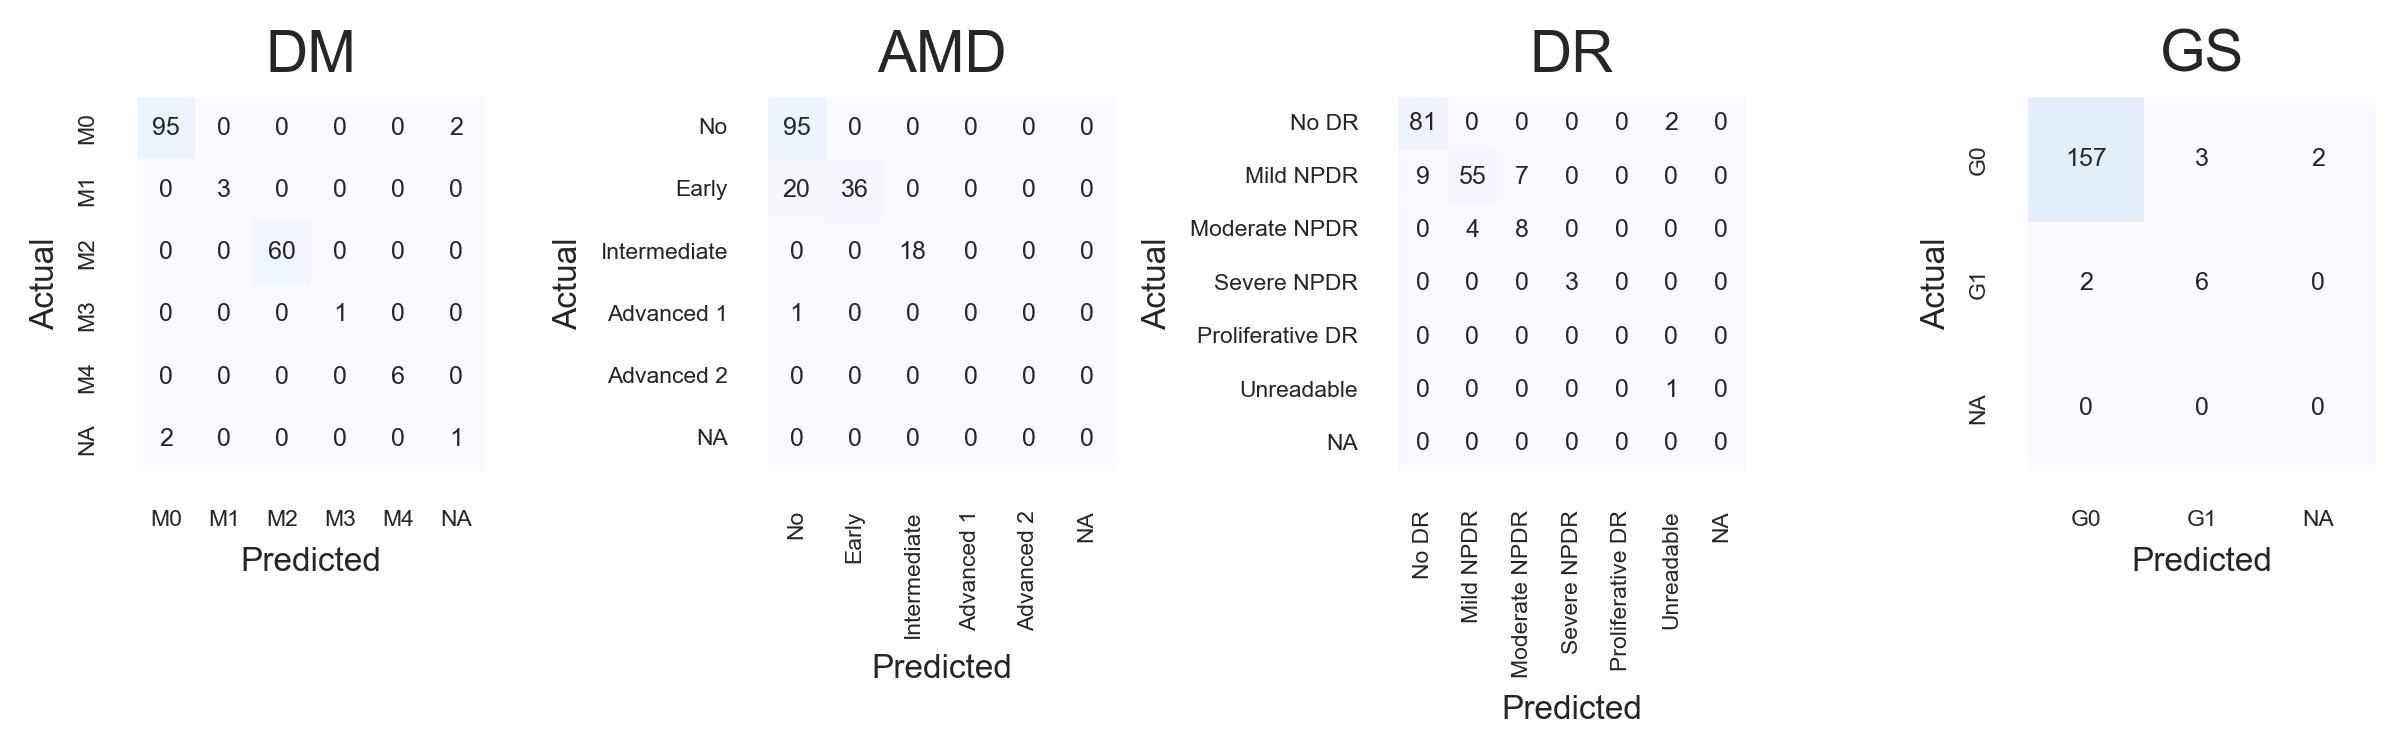

,M0,M1,M2,M3,M4,NA
M0,95,0,0,0,0,2
M1,0,3,0,0,0,0
M2,0,0,60,0,0,0
M3,0,0,0,1,0,0
M4,0,0,0,0,6,0
NA,2,0,0,0,0,1


,No,Early,Intermediate,Advanced 1,Advanced 2,NA
No,95,0,0,0,0,0
Early,20,36,0,0,0,0
Intermediate,0,0,18,0,0,0
Advanced 1,1,0,0,0,0,0
Advanced 2,0,0,0,0,0,0
NA,0,0,0,0,0,0


,No DR,Mild NPDR,Moderate NPDR,Severe NPDR,Proliferative DR,Unreadable,NA
No DR,81,0,0,0,0,2,0
Mild NPDR,9,55,7,0,0,0,0
Moderate NPDR,0,4,8,0,0,0,0
Severe NPDR,0,0,0,3,0,0,0
Proliferative DR,0,0,0,0,0,0,0
Unreadable,0,0,0,0,0,1,0
NA,0,0,0,0,0,0,0


,G0,G1,NA
G0,157,3,2
G1,2,6,0
NA,0,0,0


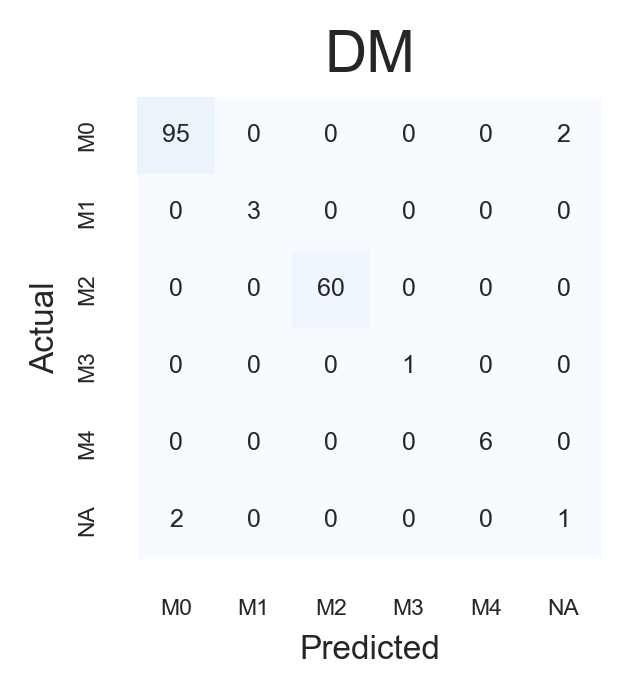

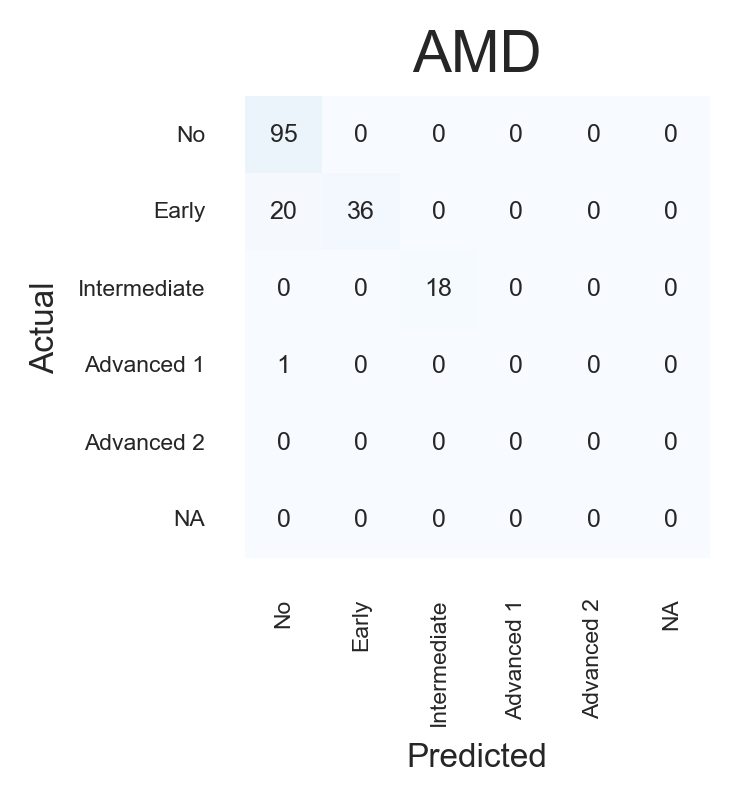

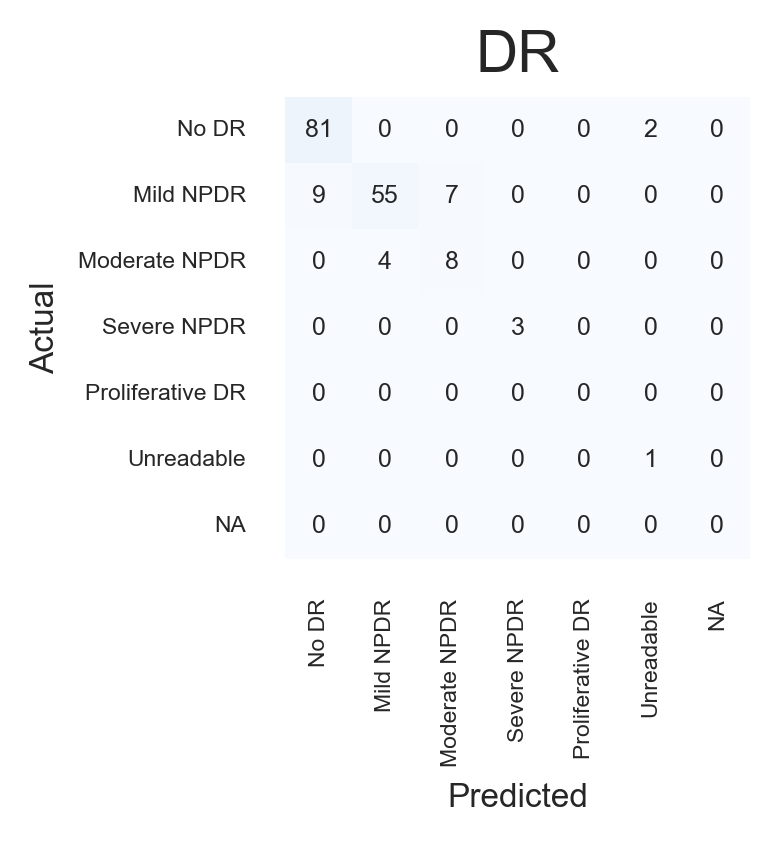

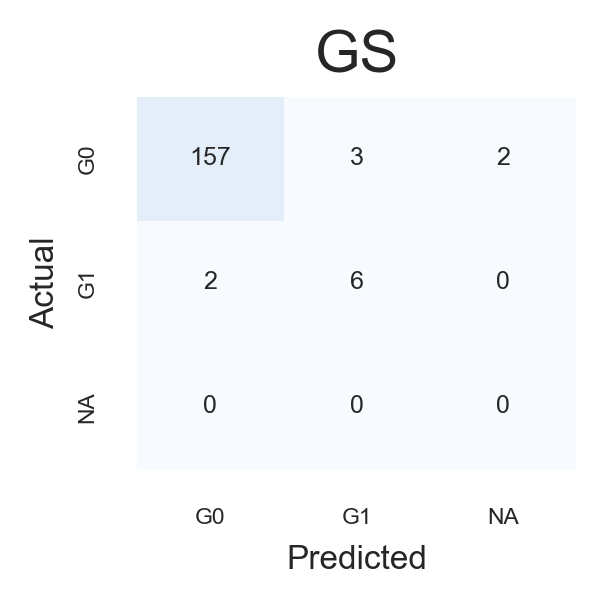

,M0,M1,M2,M3,M4,NA
M0,90,0,0,0,0,2
M1,0,17,0,0,0,0
M2,0,0,50,0,0,0
M3,0,0,0,1,0,0
M4,0,0,0,0,1,0
NA,8,0,0,0,0,1


,No,Early,Intermediate,Advanced 1,Advanced 2,NA
No,71,1,0,0,0,0
Early,17,49,0,0,0,0
Intermediate,0,0,30,0,0,0
Advanced 1,1,0,0,0,0,0
Advanced 2,1,0,0,0,0,0
NA,0,0,0,0,0,0


,No DR,Mild NPDR,Moderate NPDR,Severe NPDR,Proliferative DR,Unreadable,NA
No DR,85,0,0,0,0,1,0
Mild NPDR,2,58,7,0,0,0,0
Moderate NPDR,1,2,9,0,0,0,0
Severe NPDR,1,0,0,2,0,0,0
Proliferative DR,1,0,0,0,0,0,0
Unreadable,0,0,0,0,0,1,0
NA,0,0,0,0,0,0,0


,G0,G1,NA
G0,164,0,1
G1,0,4,0
NA,0,0,1


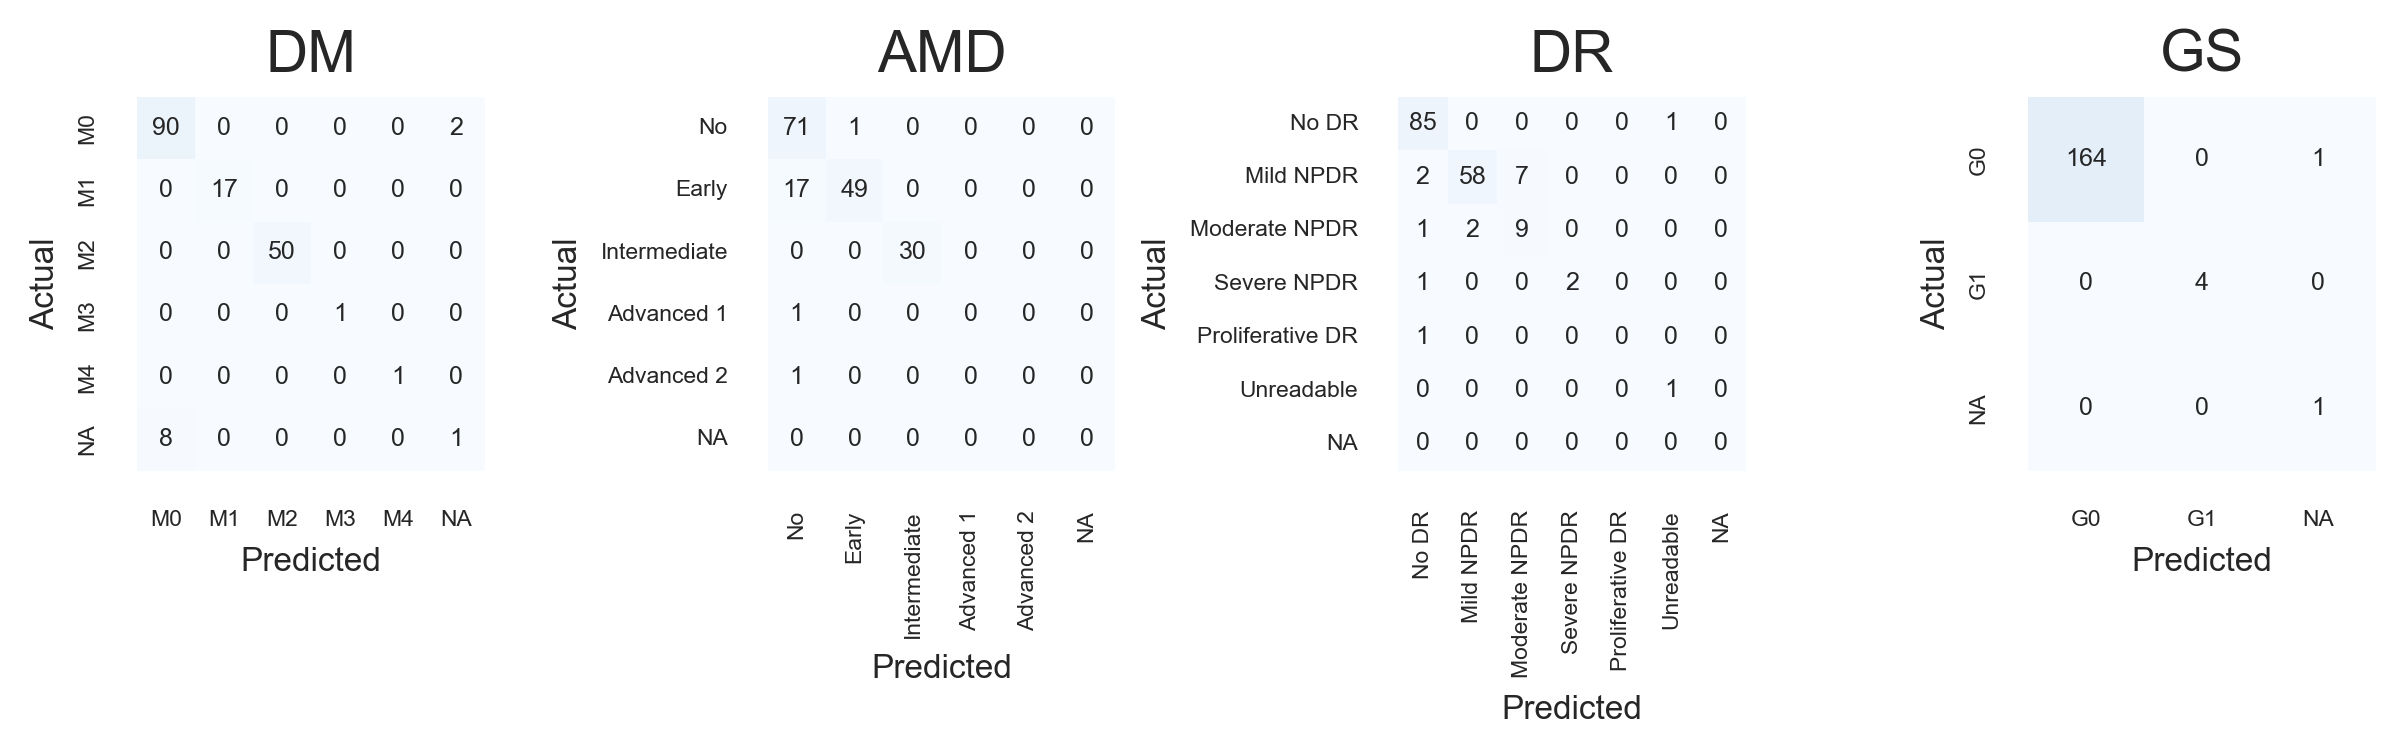

,M0,M1,M2,M3,M4,NA
M0,90,0,0,0,0,2
M1,0,17,0,0,0,0
M2,0,0,50,0,0,0
M3,0,0,0,1,0,0
M4,0,0,0,0,1,0
NA,8,0,0,0,0,1


,No,Early,Intermediate,Advanced 1,Advanced 2,NA
No,71,1,0,0,0,0
Early,17,49,0,0,0,0
Intermediate,0,0,30,0,0,0
Advanced 1,1,0,0,0,0,0
Advanced 2,1,0,0,0,0,0
NA,0,0,0,0,0,0


,No DR,Mild NPDR,Moderate NPDR,Severe NPDR,Proliferative DR,Unreadable,NA
No DR,85,0,0,0,0,1,0
Mild NPDR,2,58,7,0,0,0,0
Moderate NPDR,1,2,9,0,0,0,0
Severe NPDR,1,0,0,2,0,0,0
Proliferative DR,1,0,0,0,0,0,0
Unreadable,0,0,0,0,0,1,0
NA,0,0,0,0,0,0,0


,G0,G1,NA
G0,164,0,1
G1,0,4,0
NA,0,0,1


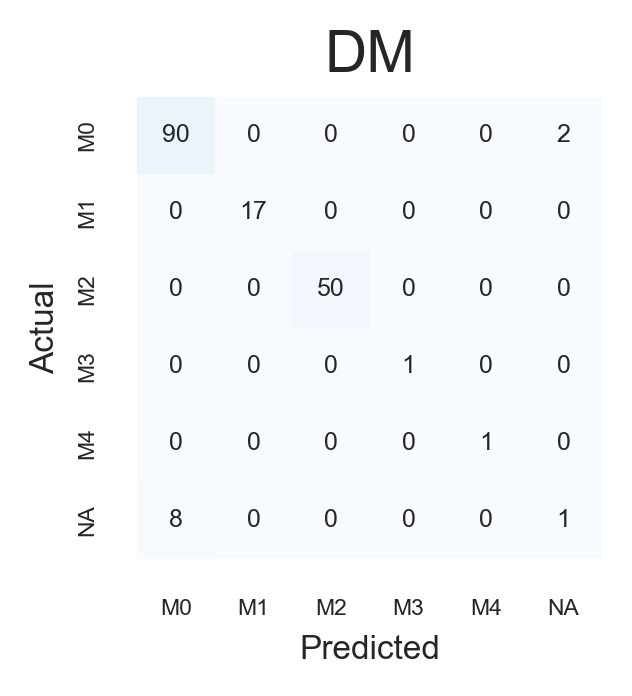

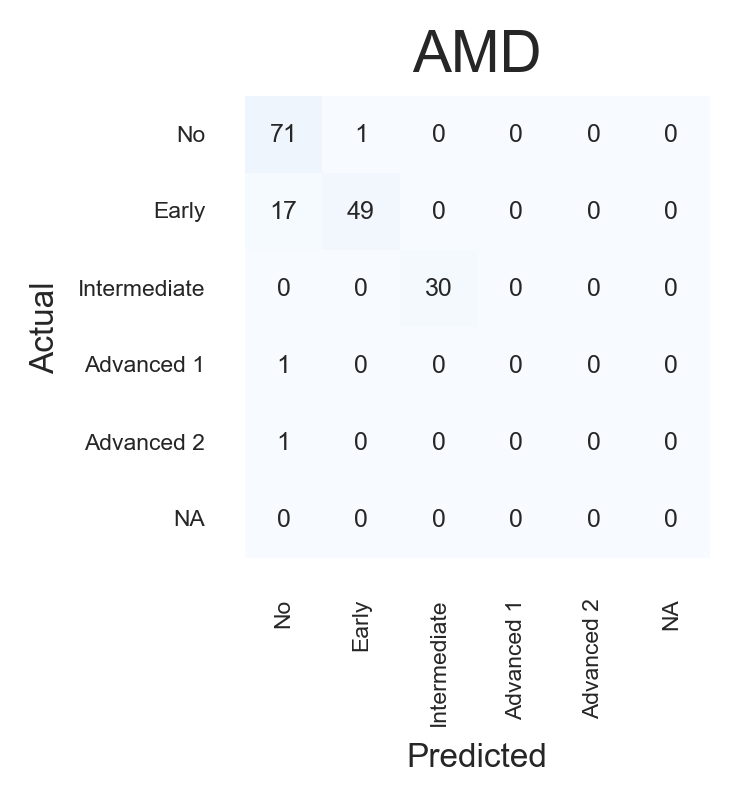

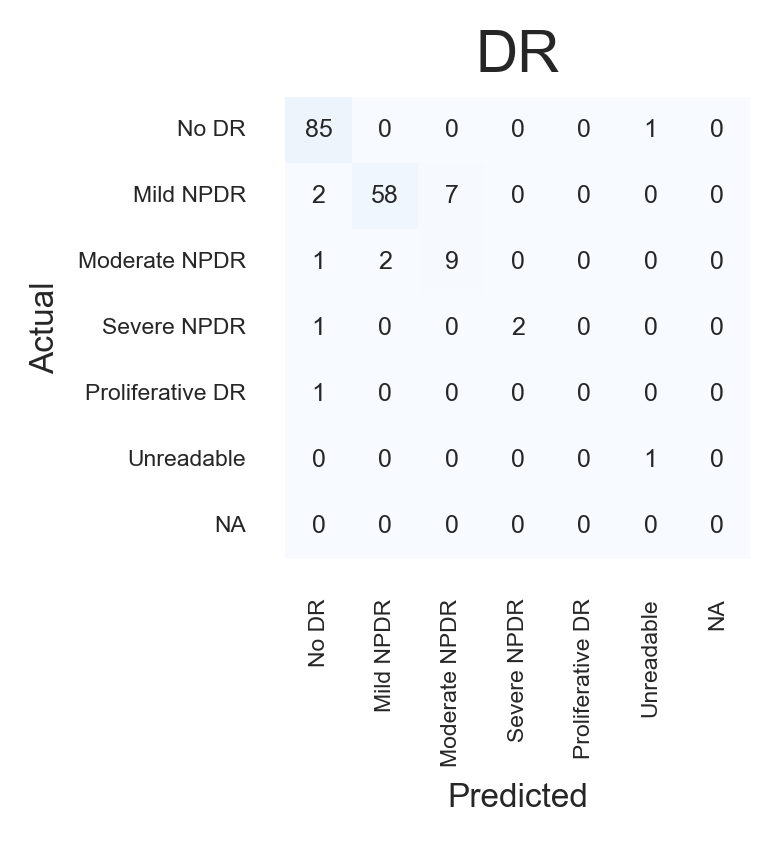

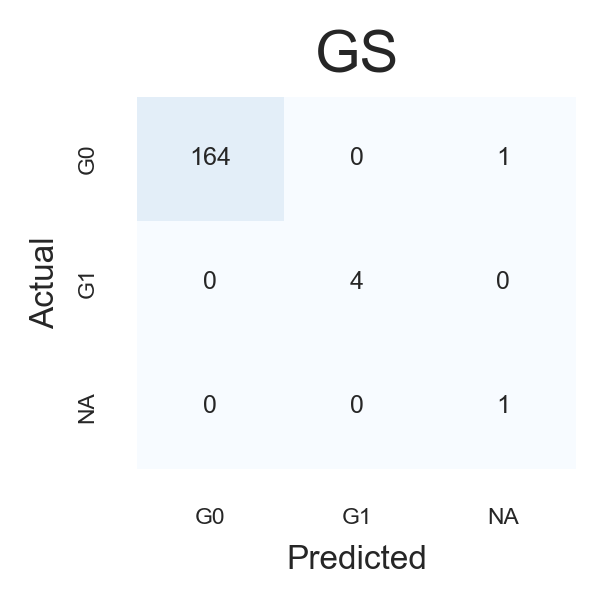

,M0,M1,M2,M3,M4,NA
M0,766,0,0,0,0,4
M1,0,67,0,0,0,0
M2,0,0,398,0,0,0
M3,0,0,0,7,0,0
M4,0,0,0,0,41,0
NA,39,0,0,1,0,33


,No,Early,Intermediate,Advanced 1,Advanced 2,NA
No,742,0,0,0,0,0
Early,105,331,0,0,0,0
Intermediate,0,1,170,0,0,0
Advanced 1,2,0,0,0,0,0
Advanced 2,0,0,1,0,0,0
NA,3,1,0,0,0,0


,No DR,Mild NPDR,Moderate NPDR,Severe NPDR,Proliferative DR,Unreadable,NA
No DR,679,0,2,0,0,3,0
Mild NPDR,34,388,48,0,0,0,0
Moderate NPDR,20,35,84,0,0,1,0
Severe NPDR,0,0,0,25,0,0,0
Proliferative DR,0,0,1,1,0,0,0
Unreadable,1,0,0,0,0,34,0
NA,0,0,0,0,0,0,0


,G0,G1,NA
G0,1266,7,10
G1,10,39,0
NA,0,0,24


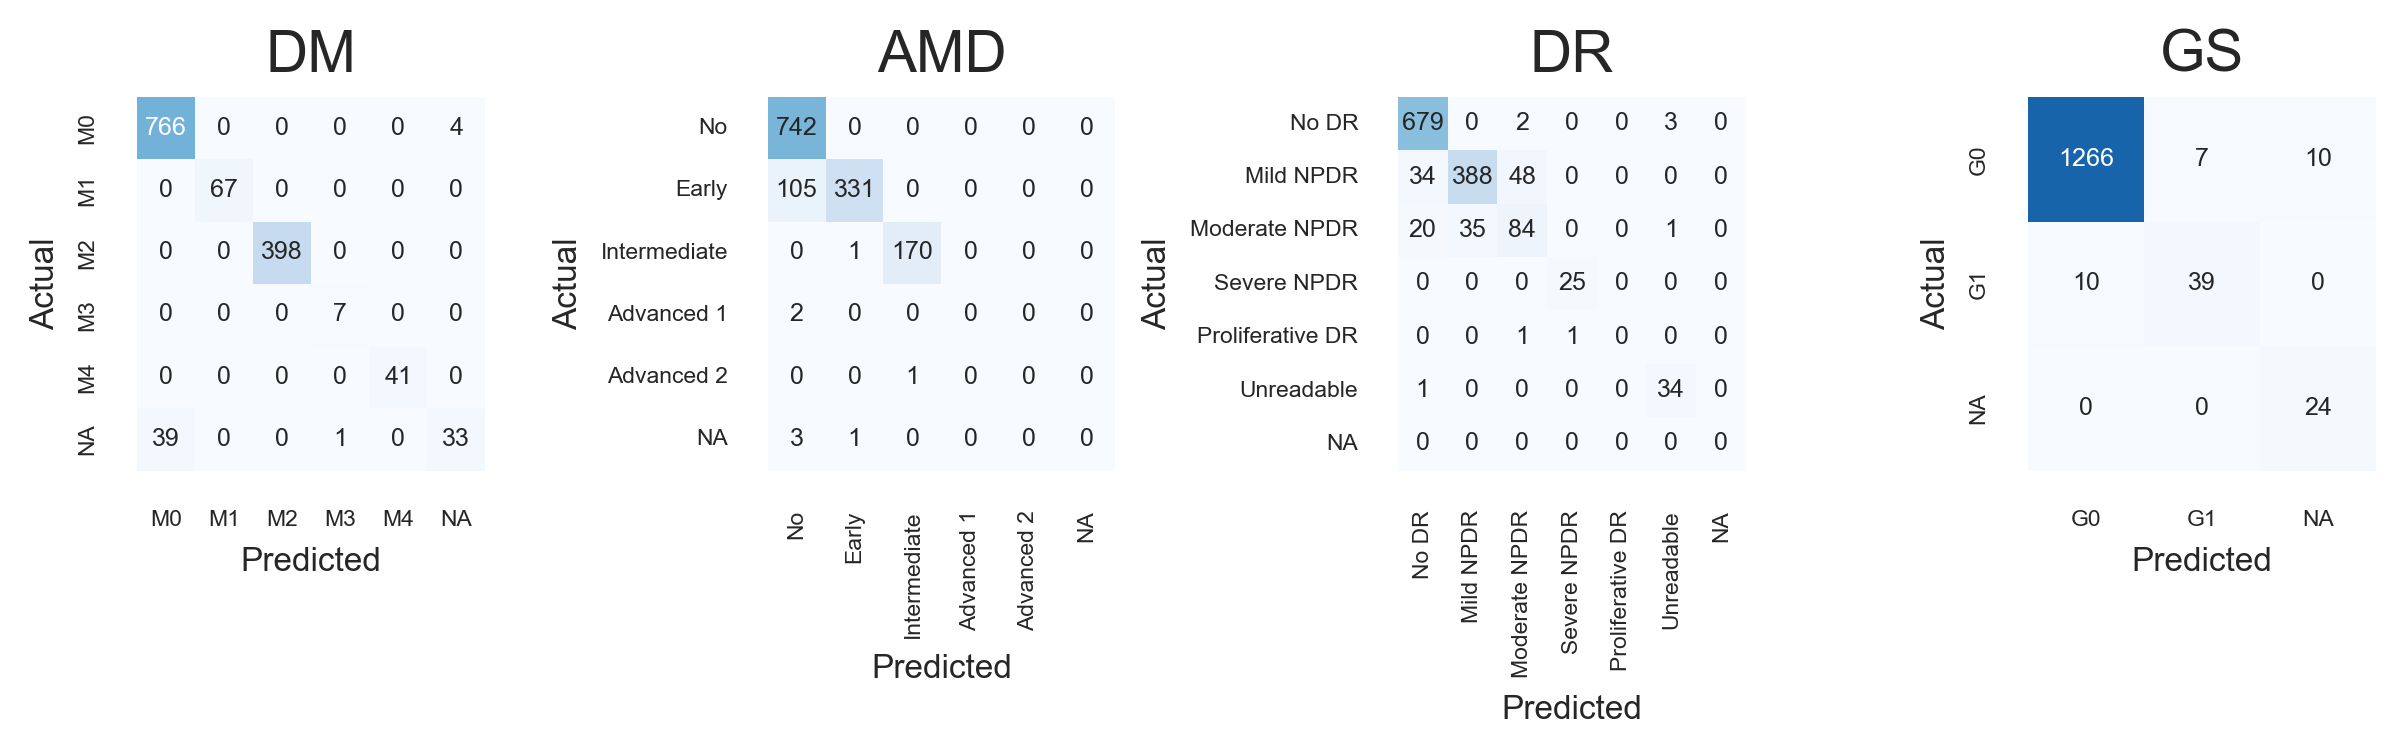

,M0,M1,M2,M3,M4,NA
M0,766,0,0,0,0,4
M1,0,67,0,0,0,0
M2,0,0,398,0,0,0
M3,0,0,0,7,0,0
M4,0,0,0,0,41,0
NA,39,0,0,1,0,33


,No,Early,Intermediate,Advanced 1,Advanced 2,NA
No,742,0,0,0,0,0
Early,105,331,0,0,0,0
Intermediate,0,1,170,0,0,0
Advanced 1,2,0,0,0,0,0
Advanced 2,0,0,1,0,0,0
NA,3,1,0,0,0,0


,No DR,Mild NPDR,Moderate NPDR,Severe NPDR,Proliferative DR,Unreadable,NA
No DR,679,0,2,0,0,3,0
Mild NPDR,34,388,48,0,0,0,0
Moderate NPDR,20,35,84,0,0,1,0
Severe NPDR,0,0,0,25,0,0,0
Proliferative DR,0,0,1,1,0,0,0
Unreadable,1,0,0,0,0,34,0
NA,0,0,0,0,0,0,0


,G0,G1,NA
G0,1266,7,10
G1,10,39,0
NA,0,0,24


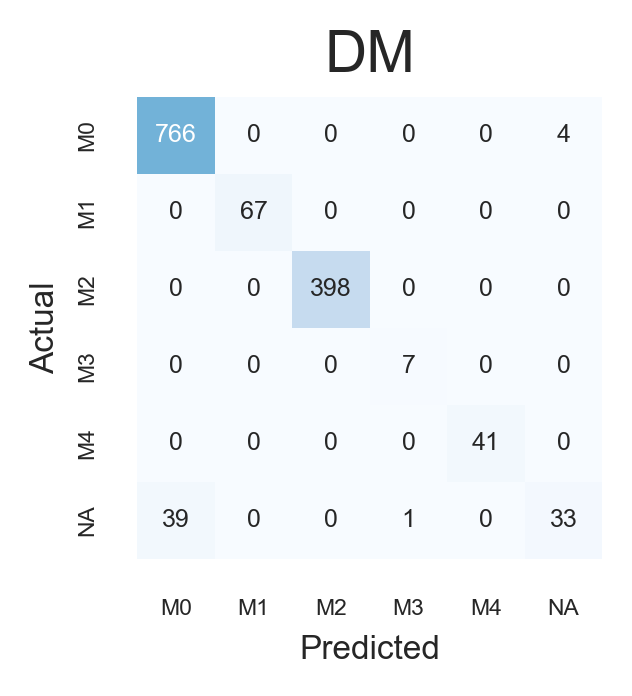

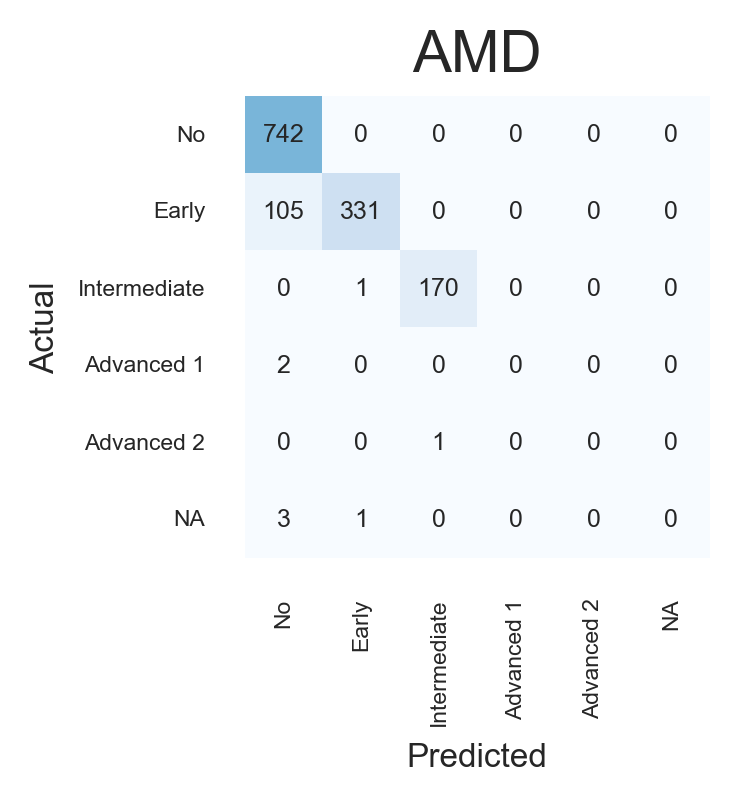

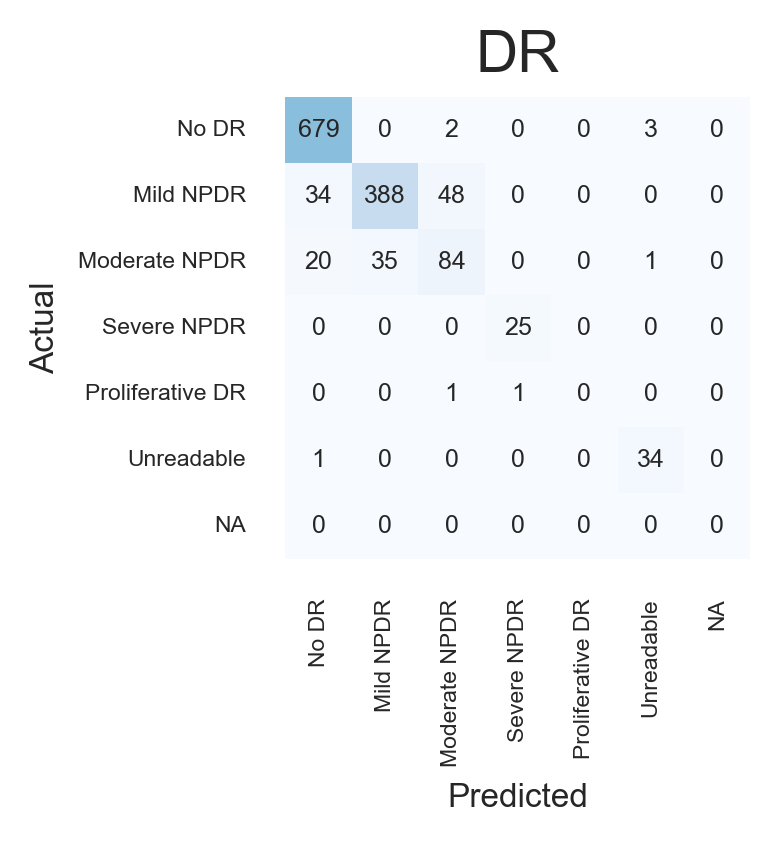

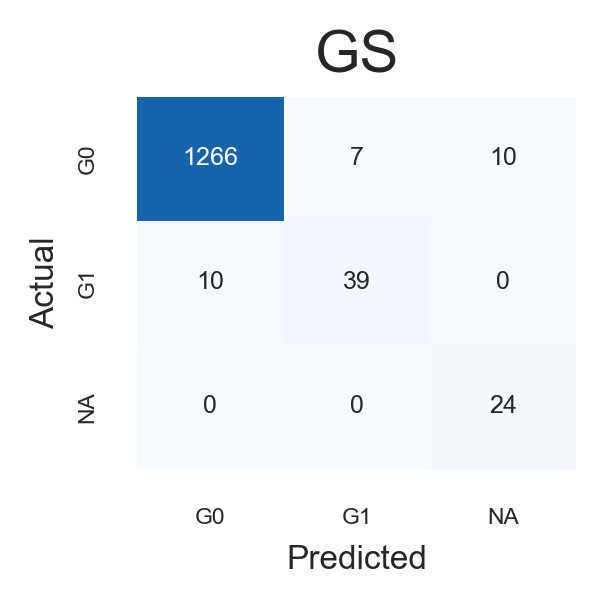

,Vision Test LE,VA LE,IOP LE,Gradable LE,Cup Disc Ratio LE,OCT RNFL_Abnormal (Progressing) LE,OCT RNFL_Abnormal (Stable) LE,OCT RNFL_Normal LE,OCT RNFL_Unreliable LE,OCT RNFL_nan LE,...,Total_Time >= 1.0 RE_fc,Total_Time >= 4.33 RE_fc,Total_Time >= 13.0 RE_fc,Total_Time >= 26.0 RE_fc,Total_Time >= 52.0 RE_fc,Total_Time >= 1.0_pred,Total_Time >= 4.33_pred,Total_Time >= 13.0_pred,Total_Time >= 26.0_pred,Total_Time >= 52.0_pred
274,1.0,0.000000,0.769231,1.0,0.894737,1,0,0,0,0,...,0.999770,0.997185,0.994258,0.133902,0.104226,0.999538,0.994350,0.988435,0.018034,1.103881e-02
126,0.0,0.000000,0.307692,1.0,0.736842,0,0,0,0,1,...,0.999917,0.999388,0.999022,0.994280,0.997841,0.999833,0.998775,0.998049,0.988624,9.956934e-01
261,1.0,0.000000,0.461538,1.0,0.736842,0,0,0,0,1,...,0.999910,0.999263,0.998962,0.971277,0.973260,0.999818,0.998527,0.997936,0.943884,9.473615e-01
472,0.0,0.222222,0.461538,1.0,0.842105,0,0,0,0,1,...,0.999880,0.999458,0.999310,0.944404,0.003427,0.999756,0.998917,0.998647,0.894268,1.266314e-05
648,0.0,0.333333,0.692308,1.0,0.684211,0,0,0,0,1,...,0.999918,0.999390,0.999032,0.994102,0.997750,0.999835,0.998781,0.998064,0.988300,9.955402e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0.0,0.000000,0.923077,1.0,0.789474,0,0,0,0,1,...,0.999923,0.999825,0.999957,0.968394,0.005373,0.999857,0.999647,0.999902,0.924482,1.876981e-05
652,0.0,0.111111,0.461538,1.0,0.894737,0,0,1,0,0,...,0.999762,0.996821,0.992899,0.118761,0.096669,0.999532,0.993934,0.986935,0.015278,9.916842e-03
620,0.0,0.000000,0.307692,0.0,0.736842,0,0,0,0,1,...,0.999765,0.998702,0.997154,0.989536,0.990241,0.999722,0.998546,0.997050,0.988761,9.888489e-01
516,0.0,0.333333,0.538462,1.0,0.789474,0,0,0,0,1,...,0.999899,0.999234,0.998934,0.974193,0.976057,0.999842,0.999054,0.998866,0.913128,2.369025e-03


,Reconstruction Error,Intermediate Binary Crossentropy,Final Binary Crossentropy
Train,0.000235,0.068424,0.068299
Validation,0.000955,0.075297,0.158700
Test,0.001565,0.083960,0.078834


In [ ]:
pred_df, prediction_performance_df = evaluate_final_model(
    fc_bilateral_model, **data_dfs, intermediate_col_dict=intermediate_col_dict, seed=seed_no,
    fp_checkpoint_folder=fp_checkpoint_folder
)
display(pred_df)
display(prediction_performance_df)

In [32]:
save_predictions(prediction_df=pred_df, name="ig", fp_checkpoint_folder=fp_checkpoint_folder)

Predictions Saved!


## Multiple Reptitions

In [5]:
from src.models.bilateral.evaluate import run_experiment_bilateral_repetition
ae_param, _  = load_hyperparameters(
    name="ae_softmax", fp_checkpoint_folder=fp_checkpoint_folder)
ic_param, _  = load_hyperparameters(
    name="ic_softmax", fp_checkpoint_folder=fp_checkpoint_folder)
fc_param, _  = load_hyperparameters(
    name="fc_softmax", fp_checkpoint_folder=fp_checkpoint_folder)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 118: early stopping
Restoring model weights from the end of the best epoch: 98.


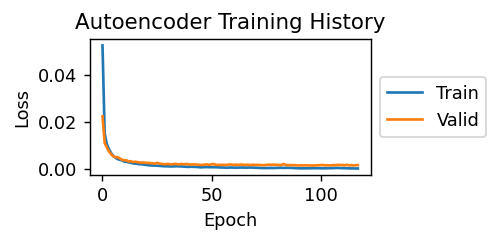

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step
Epoch 23: early stopping
Restoring model weights from the end of the best epoch: 3.


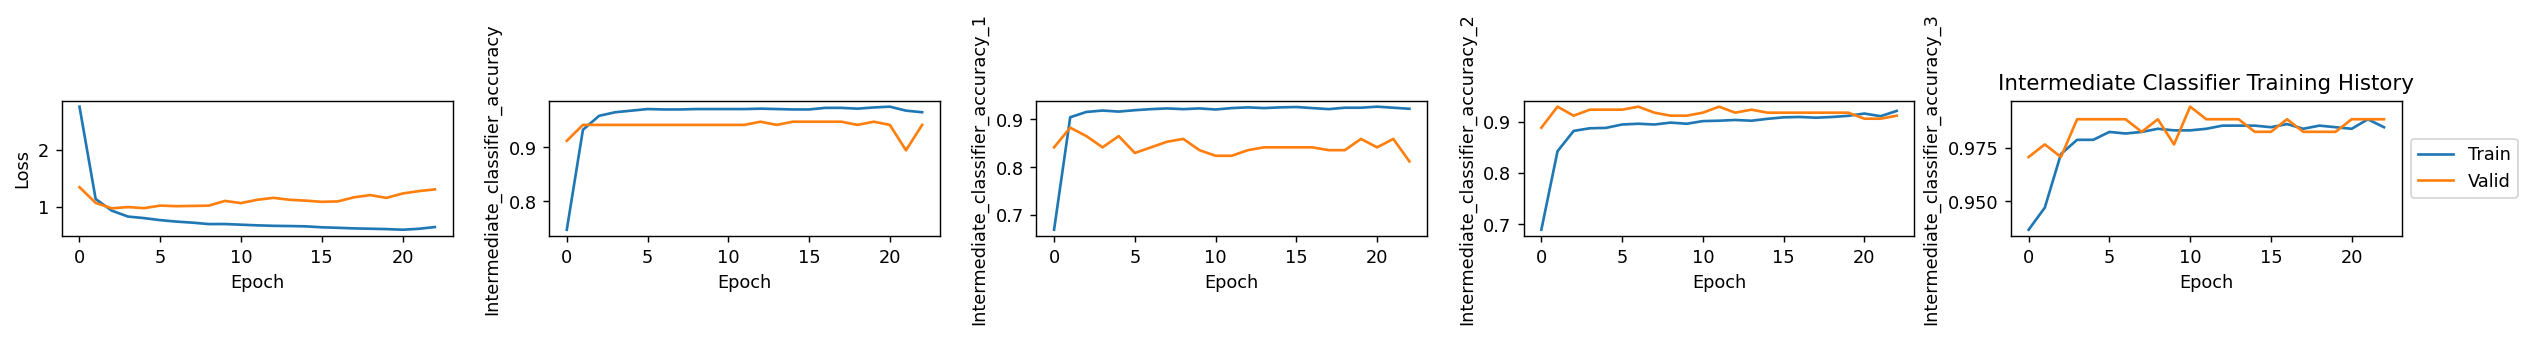

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 94: early stopping
Restoring model weights from the end of the best epoch: 74.


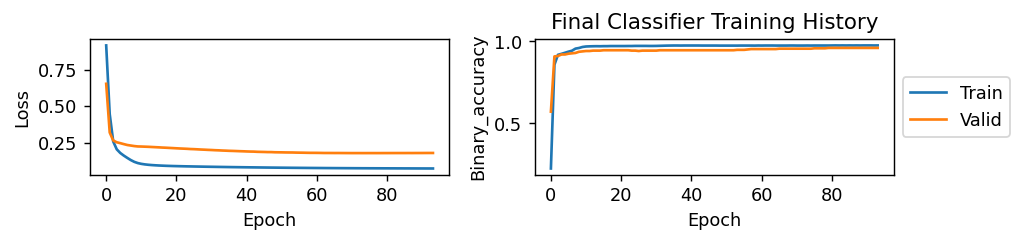

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 81: early stopping
Restoring model weights from the end of the best epoch: 61.


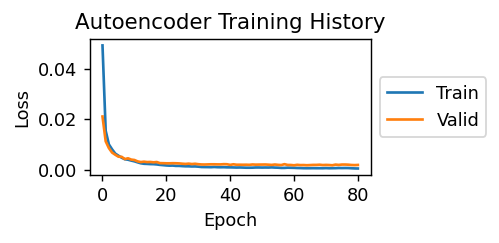

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
Epoch 25: early stopping
Restoring model weights from the end of the best epoch: 5.


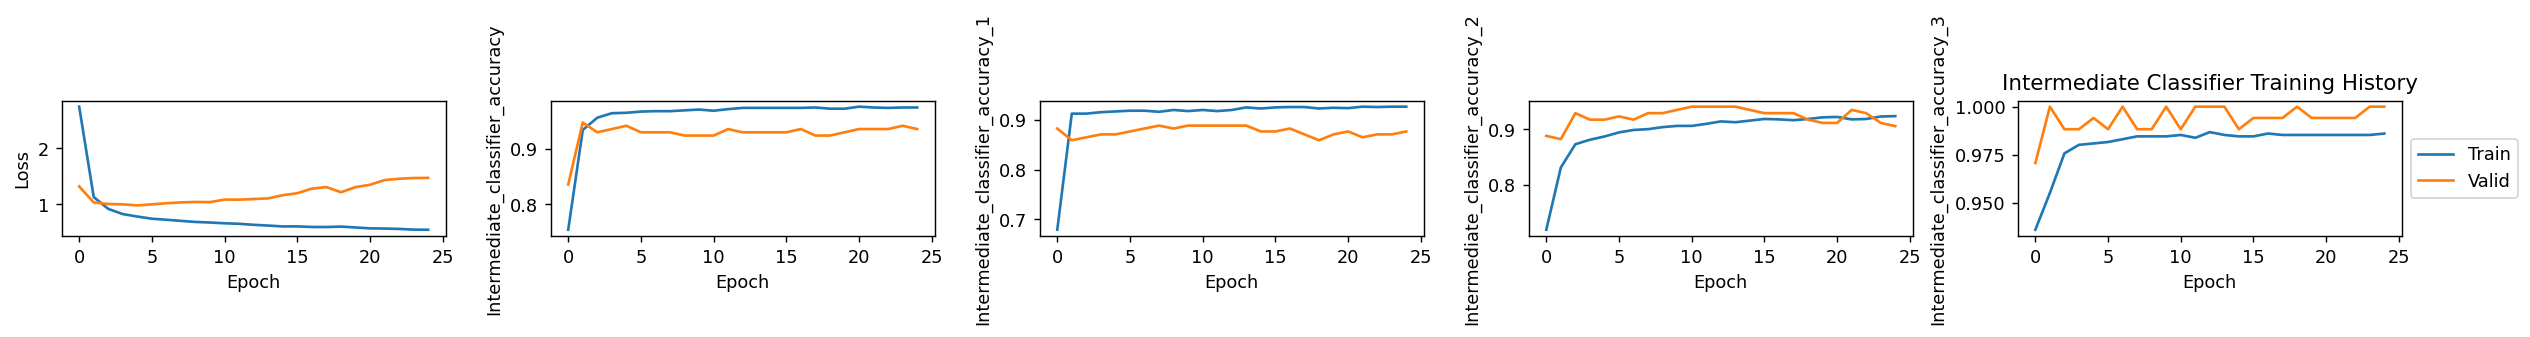

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 46: early stopping
Restoring model weights from the end of the best epoch: 26.


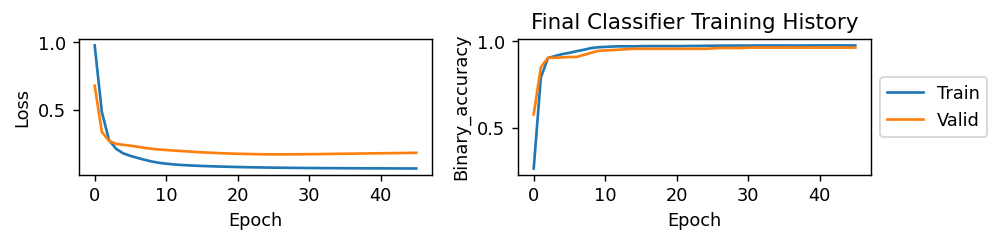

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 88: early stopping
Restoring model weights from the end of the best epoch: 68.


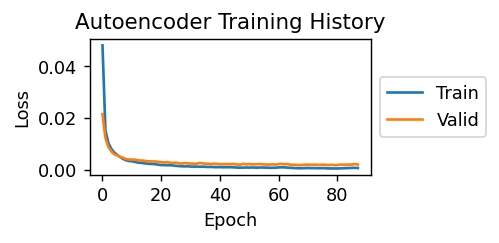

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
Epoch 25: early stopping
Restoring model weights from the end of the best epoch: 5.


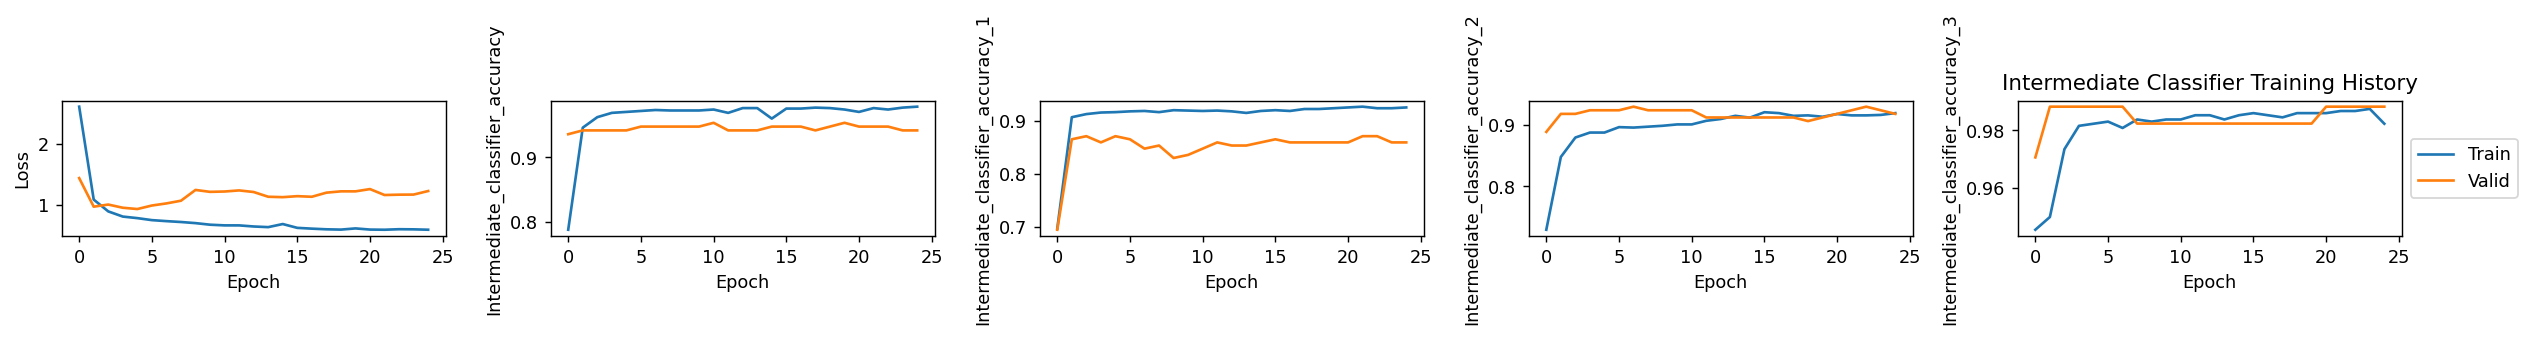

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 65: early stopping
Restoring model weights from the end of the best epoch: 45.


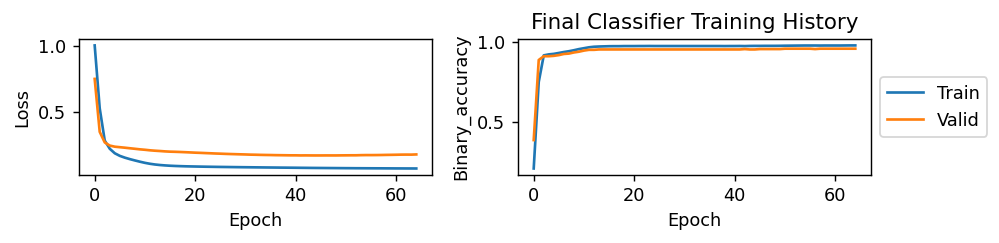

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 148: early stopping
Restoring model weights from the end of the best epoch: 128.


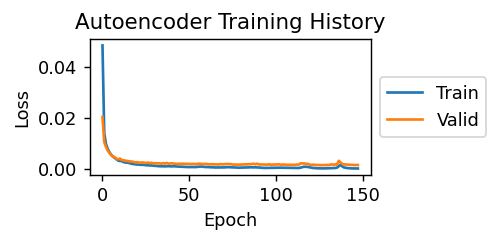

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step
Epoch 32: early stopping
Restoring model weights from the end of the best epoch: 12.


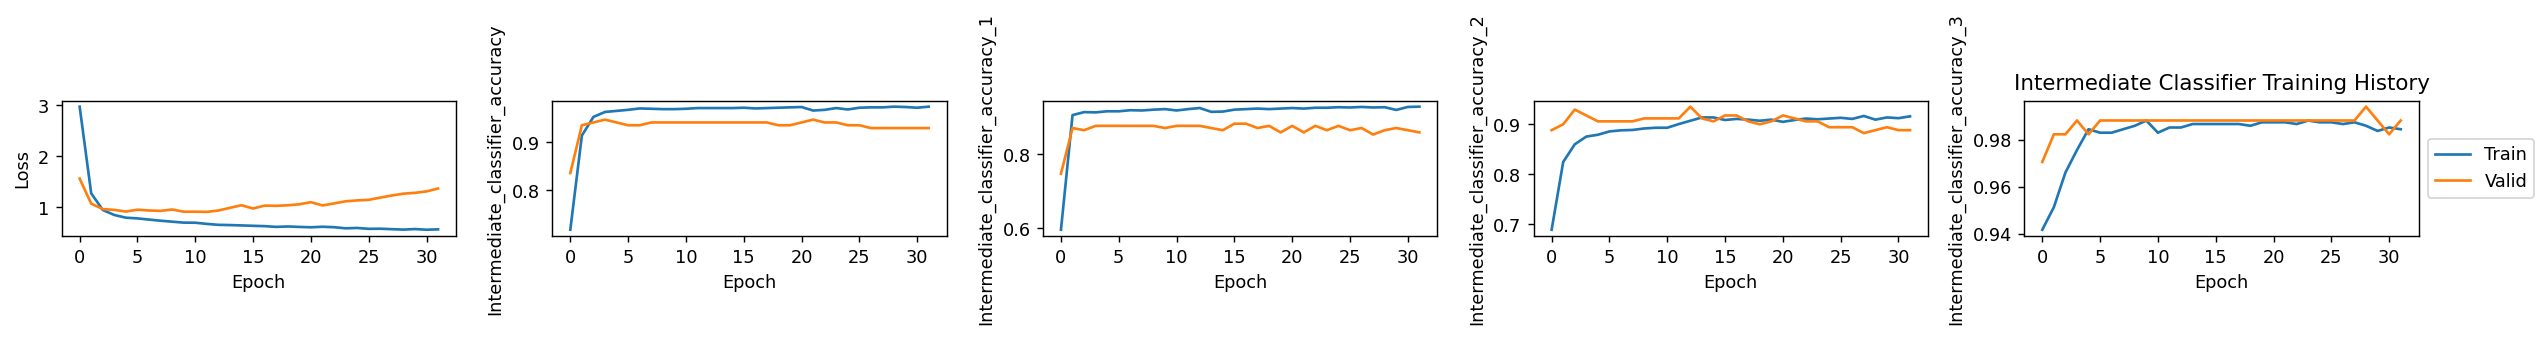

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
Epoch 36: early stopping
Restoring model weights from the end of the best epoch: 16.


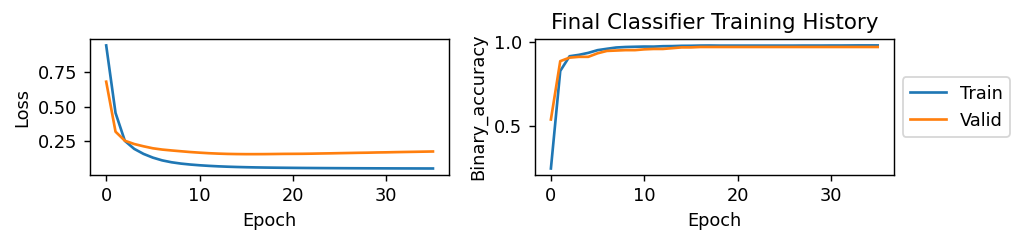

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 94: early stopping
Restoring model weights from the end of the best epoch: 74.


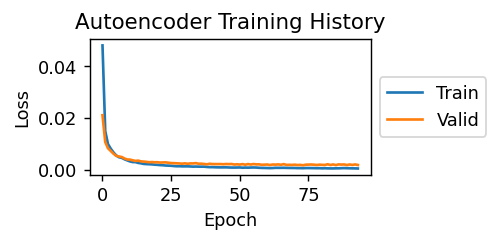

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
Epoch 24: early stopping
Restoring model weights from the end of the best epoch: 4.


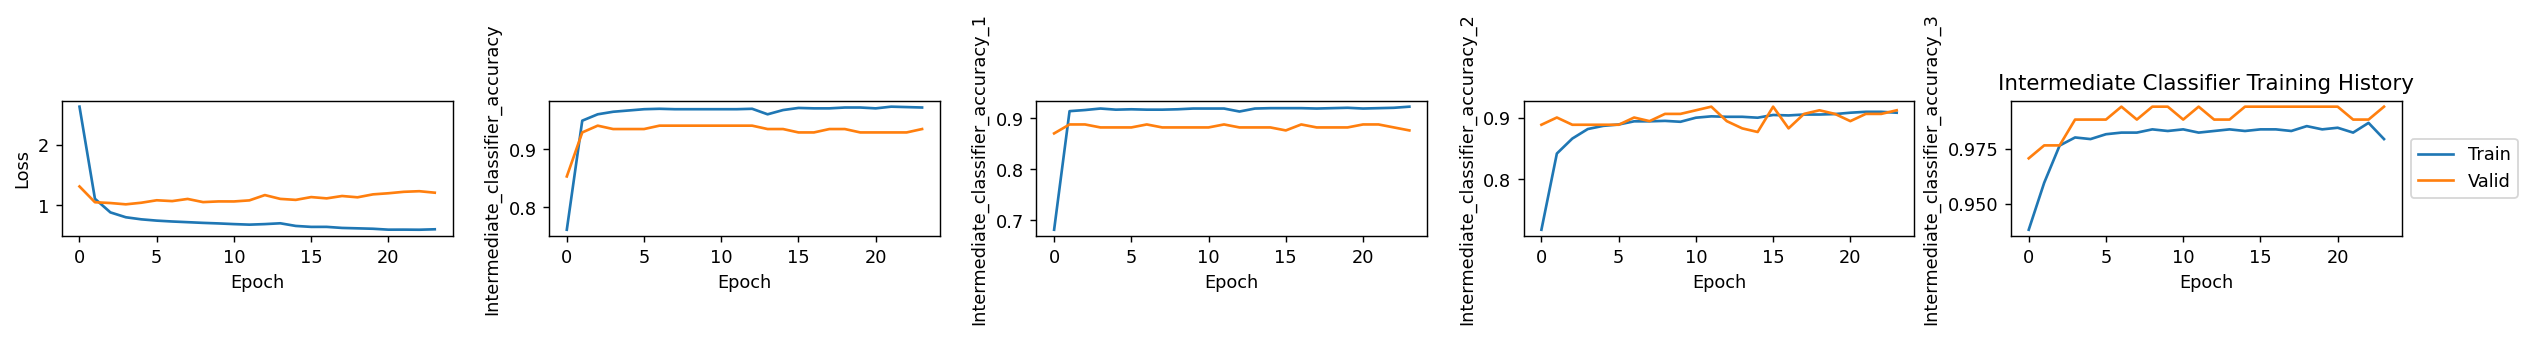

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 65: early stopping
Restoring model weights from the end of the best epoch: 45.


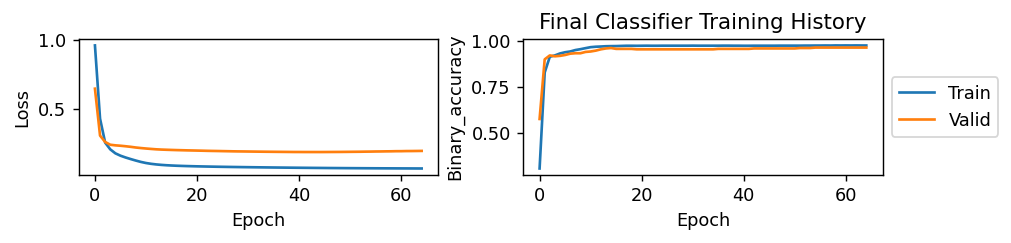

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
AE:


,Train,Valid,Test
Autoencoder MSE,0.000 ± 0.000,0.001 ± 0.000,0.002 ± 0.000


IC:


,Train,Valid,Test
DMC Categorical_crossentropy,0.100 ± 0.008,0.216 ± 0.013,0.195 ± 0.066
AMDC Categorical_crossentropy,0.239 ± 0.024,0.355 ± 0.019,0.452 ± 0.051
DRC Categorical_crossentropy,0.321 ± 0.018,0.345 ± 0.014,0.425 ± 0.038
GSC Categorical_crossentropy,0.067 ± 0.019,0.043 ± 0.016,0.107 ± 0.030
DMC Accuracy,0.970 ± 0.002,0.940 ± 0.002,0.960 ± 0.002
AMDC Accuracy,0.918 ± 0.003,0.873 ± 0.006,0.873 ± 0.008
DRC Accuracy,0.891 ± 0.007,0.911 ± 0.012,0.865 ± 0.015
GSC Accuracy,0.981 ± 0.005,0.986 ± 0.008,0.968 ± 0.010
DMC F1_score,0.933 ± 0.010,0.850 ± 0.003,0.675 ± 0.029
AMDC F1_score,0.514 ± 0.066,0.539 ± 0.003,0.667 ± 0.007


FC:


,Train,Valid,Test
Accuracy Total_Time >= 1.0,0.000 ± 0.000,0.000 ± 0.000,nan ± nan
Accuracy Total_Time >= 13.0,0.595 ± 0.035,0.836 ± 0.036,0.567 ± 0.082
Accuracy Total_Time >= 26.0,0.944 ± 0.032,0.950 ± 0.017,0.963 ± 0.000
Accuracy Total_Time >= 4.33,0.966 ± 0.022,0.600 ± 0.000,0.850 ± 0.050
Accuracy Total_Time >= 52.0,0.992 ± 0.002,0.979 ± 0.019,0.995 ± 0.010
Final Classifier Accuracy,0.908 ± 0.003,0.906 ± 0.017,0.911 ± 0.012
Final Classifier Bin Accuracy,0.976 ± 0.001,0.959 ± 0.006,0.974 ± 0.005
Final Classifier Crossentropy,0.069 ± 0.004,0.172 ± 0.010,0.102 ± 0.018
Total_Time >= 1.0 Proportion,0.004 ± 0.000,0.024 ± 0.000,0.000 ± 0.000
Total_Time >= 13.0 Proportion,0.164 ± 0.000,0.129 ± 0.000,0.141 ± 0.000


In [9]:
ae_repetition_perf_df, ic_repetition_perf_df, fc_repetition_perf_df = run_experiment_bilateral_repetition(
    ae_param=ae_param, ic_param=ic_param, fc_param=fc_param, 
    data_dfs=data_dfs, col_info=col_info, batch_size=batch_size, 
    repetitions=repetitions, seed=seed_no, dp=3
)
print("AE:")
display(ae_repetition_perf_df)
print("IC:")
display(ic_repetition_perf_df)
print("FC:")
display(fc_repetition_perf_df)

In [10]:
print("AE:")
display(ae_repetition_perf_df)
print("IC:")
display(ic_repetition_perf_df)
print("FC:")
display(fc_repetition_perf_df)

AE:


,Train,Valid,Test
Autoencoder MSE,0.000 ± 0.000,0.001 ± 0.000,0.002 ± 0.000


IC:


,Train,Valid,Test
DMC Categorical_crossentropy,0.100 ± 0.008,0.216 ± 0.013,0.195 ± 0.066
AMDC Categorical_crossentropy,0.239 ± 0.024,0.355 ± 0.019,0.452 ± 0.051
DRC Categorical_crossentropy,0.321 ± 0.018,0.345 ± 0.014,0.425 ± 0.038
GSC Categorical_crossentropy,0.067 ± 0.019,0.043 ± 0.016,0.107 ± 0.030
DMC Accuracy,0.970 ± 0.002,0.940 ± 0.002,0.960 ± 0.002
AMDC Accuracy,0.918 ± 0.003,0.873 ± 0.006,0.873 ± 0.008
DRC Accuracy,0.891 ± 0.007,0.911 ± 0.012,0.865 ± 0.015
GSC Accuracy,0.981 ± 0.005,0.986 ± 0.008,0.968 ± 0.010
DMC F1_score,0.933 ± 0.010,0.850 ± 0.003,0.675 ± 0.029
AMDC F1_score,0.514 ± 0.066,0.539 ± 0.003,0.667 ± 0.007


FC:


,Train,Valid,Test
Accuracy Total_Time >= 1.0,0.000 ± 0.000,0.000 ± 0.000,nan ± nan
Accuracy Total_Time >= 13.0,0.595 ± 0.035,0.836 ± 0.036,0.567 ± 0.082
Accuracy Total_Time >= 26.0,0.944 ± 0.032,0.950 ± 0.017,0.963 ± 0.000
Accuracy Total_Time >= 4.33,0.966 ± 0.022,0.600 ± 0.000,0.850 ± 0.050
Accuracy Total_Time >= 52.0,0.992 ± 0.002,0.979 ± 0.019,0.995 ± 0.010
Final Classifier Accuracy,0.908 ± 0.003,0.906 ± 0.017,0.911 ± 0.012
Final Classifier Bin Accuracy,0.976 ± 0.001,0.959 ± 0.006,0.974 ± 0.005
Final Classifier Crossentropy,0.069 ± 0.004,0.172 ± 0.010,0.102 ± 0.018
Total_Time >= 1.0 Proportion,0.004 ± 0.000,0.024 ± 0.000,0.000 ± 0.000
Total_Time >= 13.0 Proportion,0.164 ± 0.000,0.129 ± 0.000,0.141 ± 0.000
